In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.stats.api as sms
import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams.update({'font.size': 20})

## Data Import and Processing

In [2]:
df = pd.read_csv(r'C:\Users\mayan\OneDrive\Documents\datasets\abalone.csv')
df.shape

(4177, 9)

In [3]:
df.isnull().values.any()

False

#### Exploratory Graphs

Text(0, 0.5, 'Shucked weight')

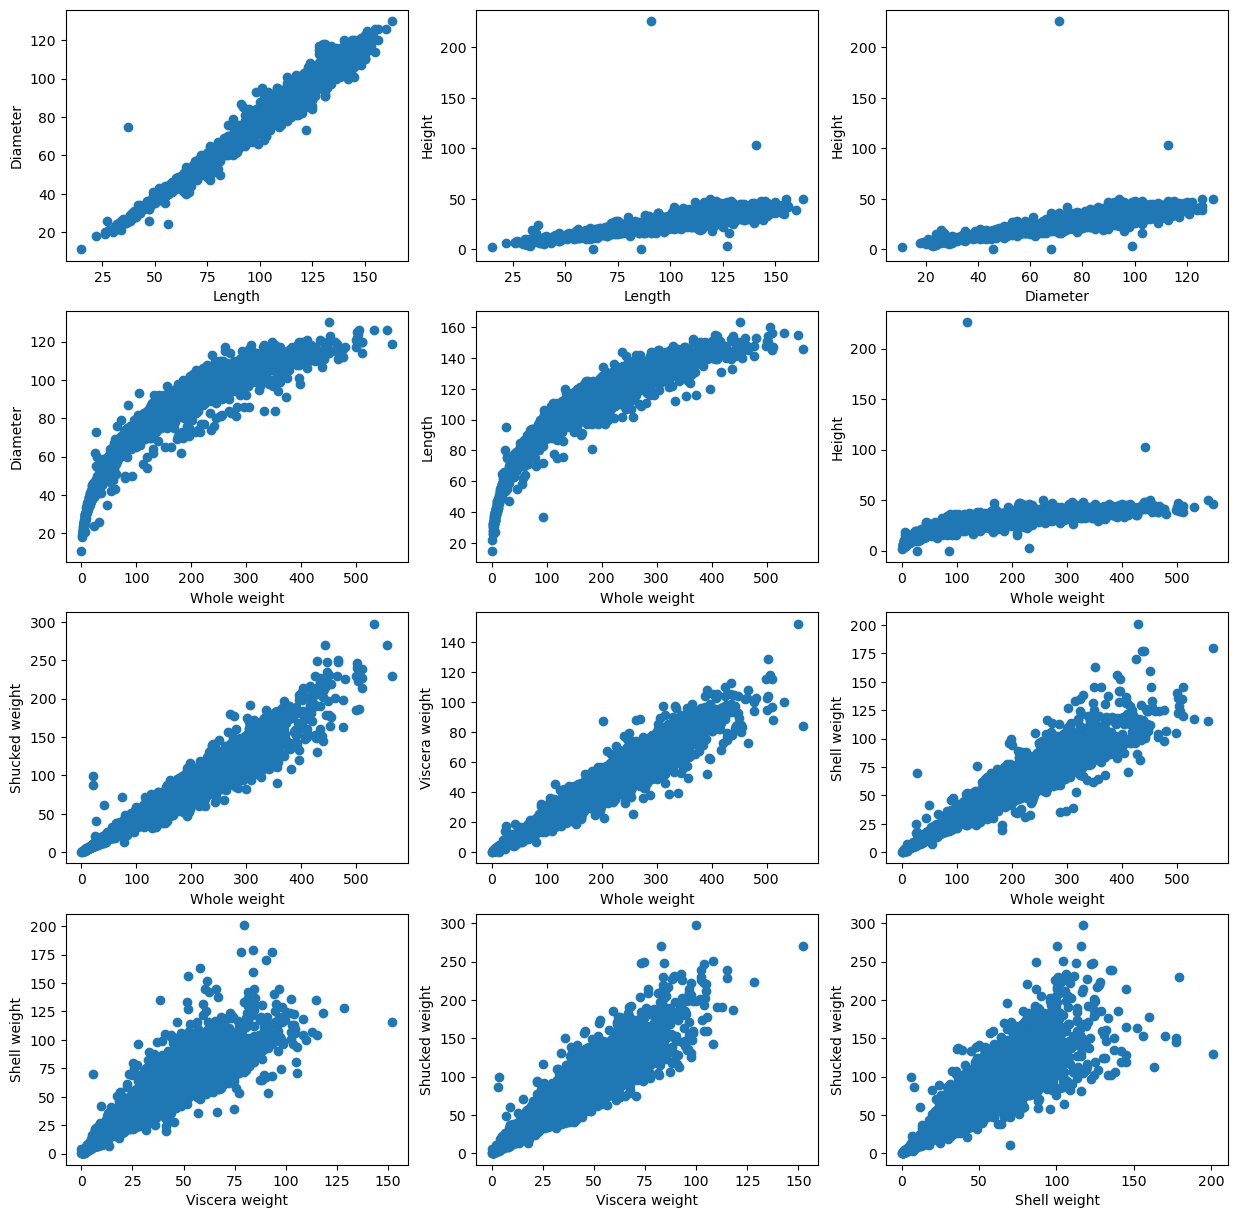

In [4]:
plt.rcParams.update({'font.size': 10})
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7, ax8, ax9),(ax10, ax11, ax12)) = plt.subplots(4,3)
ax1.scatter(df['Length'], df['Diameter'])
ax1.set_xlabel('Length')
ax1.set_ylabel('Diameter')
ax2.scatter(df['Length'], df['Height'])
ax2.set_xlabel('Length')
ax2.set_ylabel('Height')
ax3.scatter(df['Diameter'], df['Height'])
ax3.set_xlabel('Diameter')
ax3.set_ylabel('Height')
ax4.scatter(df['Whole weight'], df['Diameter'])
ax4.set_xlabel('Whole weight')
ax4.set_ylabel('Diameter')
ax5.scatter(df['Whole weight'], df['Length'])
ax5.set_xlabel('Whole weight')
ax5.set_ylabel('Length')
ax6.scatter(df['Whole weight'], df['Height'])
ax6.set_xlabel('Whole weight')
ax6.set_ylabel('Height')
ax7.scatter(df['Whole weight'], df['Shucked weight'])
ax7.set_xlabel('Whole weight')
ax7.set_ylabel('Shucked weight')
ax8.scatter(df['Whole weight'], df['Viscera weight'])
ax8.set_xlabel('Whole weight')
ax8.set_ylabel('Viscera weight')
ax9.scatter(df['Whole weight'], df['Shell weight'])
ax9.set_xlabel('Whole weight')
ax9.set_ylabel('Shell weight')
ax10.scatter(df['Viscera weight'], df['Shell weight'])
ax10.set_xlabel('Viscera weight')
ax10.set_ylabel('Shell weight')
ax11.scatter(df['Viscera weight'], df['Shucked weight'])
ax11.set_xlabel('Viscera weight')
ax11.set_ylabel('Shucked weight')
ax12.scatter(df['Shell weight'], df['Shucked weight'])
ax12.set_xlabel('Shell weight')
ax12.set_ylabel('Shucked weight')


#### Adding Class based on the number of Rings

In [5]:
con = [
    (df['Rings'] <= 7),
    (df['Rings'] > 7) & (df['Rings'] <= 10),
    (df['Rings'] >= 11) & (df['Rings'] <= 15),
    (df['Rings'] > 15)
    ]
val = [1, 2, 3, 4]
df['Class'] = np.select(con, val)
df.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M      91        73      19         102.8            44.9            20.2   
1   M      70        53      18          45.1            19.9             9.7   
2   F     106        84      27         135.4            51.3            28.3   
3   M      88        73      25         103.2            43.1            22.8   
4   I      66        51      16          41.0            17.9             7.9   

   Shell weight  Rings  Class  
0          30.0     15      3  
1          14.0      7      1  
2          42.0      9      2  
3          31.0     10      2  
4          11.0      7      1

In [6]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean    104.798420    81.576251    27.903280    165.748432       71.873498   
std      24.018583    19.847973     8.365411     98.077804       44.392590   
min      15.000000    11.000000     0.000000      0.400000        0.200000   
25%      90.000000    70.000000    23.000000     88.300000       37.200000   
50%     109.000000    85.000000    28.000000    159.900000       67.200000   
75%     123.000000    96.000000    33.000000    230.600000      100.400000   
max     163.000000   130.000000   226.000000    565.100000      297.600000   

       Viscera weight  Shell weight        Rings        Class  
count     4177.000000   4177.000000  4177.000000  4177.000000  
mean        36.118722     47.766172     9.933684     2.208044  
std         21.922850     27.840534     3.224169     0.831638  
min          0.100000      0.300000     1.000000     1.000000  
25%         18.700000     26.000000     8.000000     2.000000  
50%         34.200000     46.800000     9.000000     2.000000  
75%         50.600000     65.800000    11.000000     3.000000  
max        152.000000    201.000000    29.000000     4.000000

#### Histogram of distribution on Class

In [7]:
dfi = df.loc[df["Sex"] == 'I']
dfm = df.loc[df["Sex"] == 'M']
dff = df.loc[df["Sex"] == 'F']
x = dfi['Class']
y = dff['Class']
z = dfm['Class']

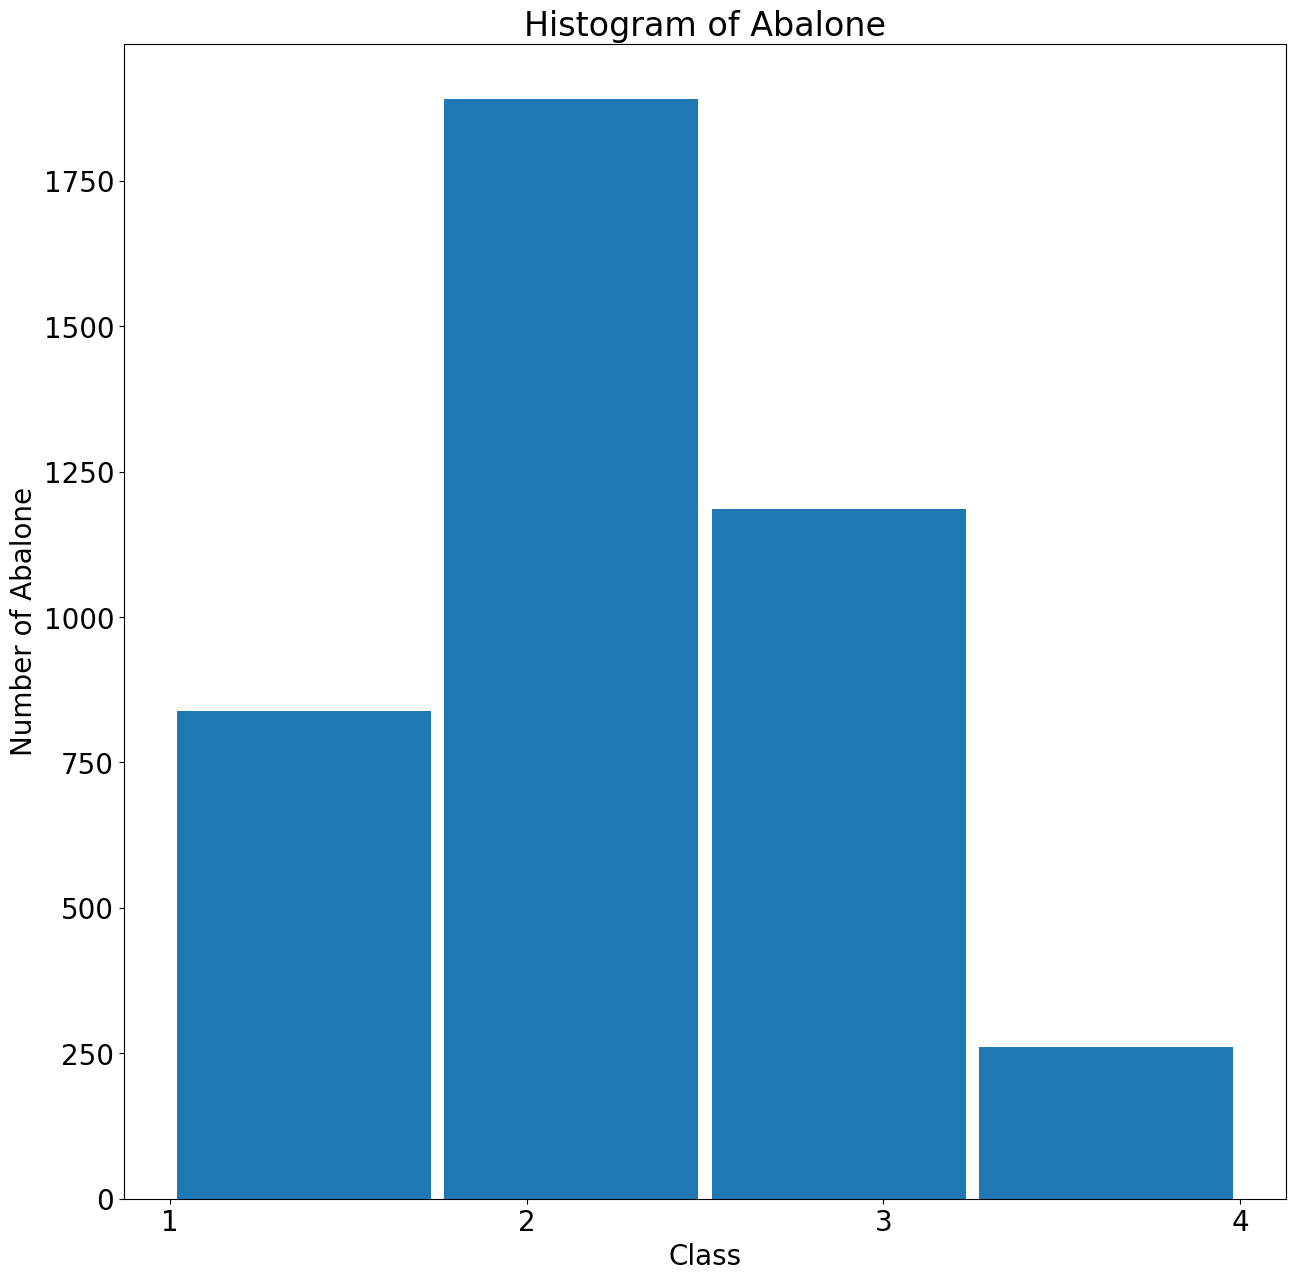

In [8]:
plt.rcParams.update({'font.size': 20})
fig, ax1 = plt.subplots(1,1)
p4 = ax1.hist(df['Class'],bins = 4,histtype = 'bar',rwidth = 0.95,align = 'mid')
ax1.set_xlabel('Class')
ax1.set_ylabel('Number of Abalone')
ax1.set_title('Histogram of Abalone')
plt.xticks(range(1,5,1))
plt.savefig('hist.png')

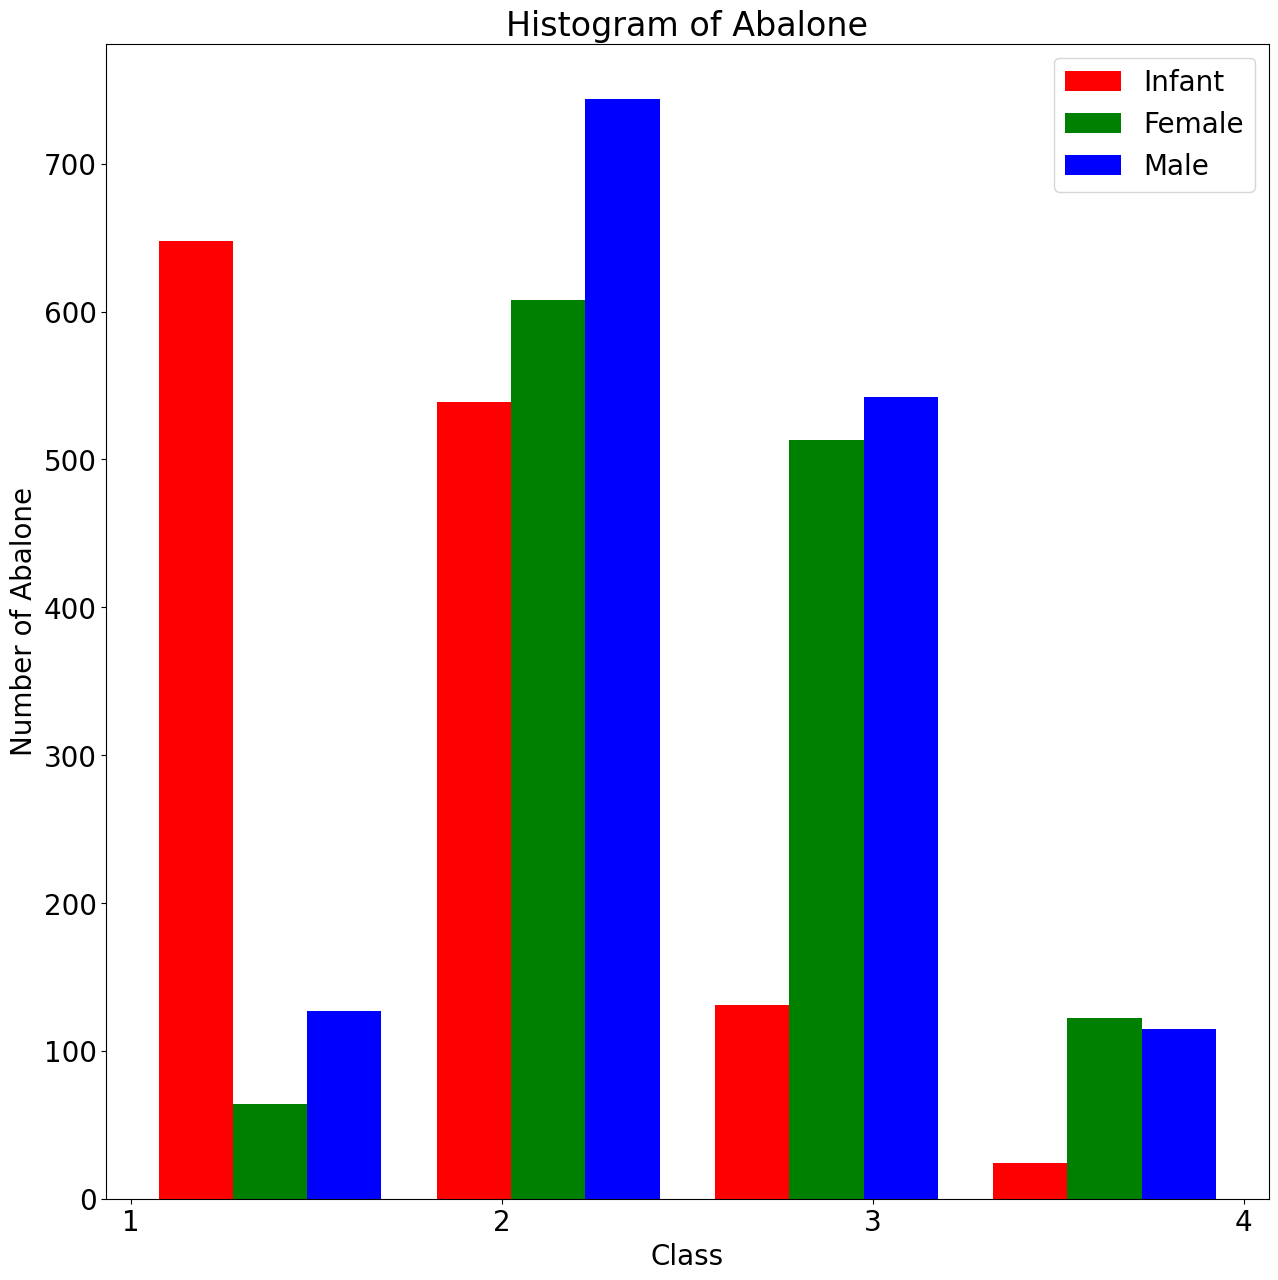

In [9]:
fig, ax1 = plt.subplots(1,1)
p4 = ax1.hist([x, y, z], bins = 4,color = ('red', 'green', 'blue'))
ax1.set_xlabel('Class')
ax1.set_ylabel('Number of Abalone')
ax1.set_title('Histogram of Abalone')
plt.xticks(range(1,5,1))
ax1.legend(['Infant','Female','Male'], loc ='upper right')
plt.savefig('histmf.png')

#### Encoding the Sex feature into dummy variables

In [10]:
dfef = pd.get_dummies(df, columns= ['Sex'])
dfef.head()

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      91        73      19         102.8            44.9            20.2   
1      70        53      18          45.1            19.9             9.7   
2     106        84      27         135.4            51.3            28.3   
3      88        73      25         103.2            43.1            22.8   
4      66        51      16          41.0            17.9             7.9   

   Shell weight  Rings  Class  Sex_F  Sex_I  Sex_M  
0          30.0     15      3      0      0      1  
1          14.0      7      1      0      0      1  
2          42.0      9      2      1      0      0  
3          31.0     10      2      0      0      1  
4          11.0      7      1      0      1      0

#### Droping Rings as a feature in the dataset

In [11]:
dfef = dfef.drop(['Rings'], axis=1)
dfef

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0         91        73      19         102.8            44.9            20.2   
1         70        53      18          45.1            19.9             9.7   
2        106        84      27         135.4            51.3            28.3   
3         88        73      25         103.2            43.1            22.8   
4         66        51      16          41.0            17.9             7.9   
...      ...       ...     ...           ...             ...             ...   
4172     113        90      33         177.4            74.0            47.8   
4173     118        88      27         193.2            87.8            42.9   
4174     120        95      41         235.2           105.1            57.5   
4175     125        97      30         218.9           106.2            52.2   
4176     142       111      39         389.7           189.1            75.3   

      Shell weight  Class  Sex_F  Sex_I  Sex_M  
0             30.0      3      0      0      1  
1             14.0      1      0      0      1  
2             42.0      2      1      0      0  
3             31.0      2      0      0      1  
4             11.0      1      0      1      0  
...            ...    ...    ...    ...    ...  
4172          49.8      3      1      0      0  
4173          52.1      2      0      0      1  
4174          61.6      2      0      0      1  
4175          59.2      2      1      0      0  
4176          99.0      3      0      0      1  

[4177 rows x 11 columns]

In [12]:
x = dfef[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Sex_F','Sex_I','Sex_M']]
y = dfef[['Class']]

**Train Test Split**

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.4, random_state=42, shuffle=True)

## Decision Tree 

In [14]:
fdt = DecisionTreeClassifier(criterion='gini',random_state= 42)
fdt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=42)

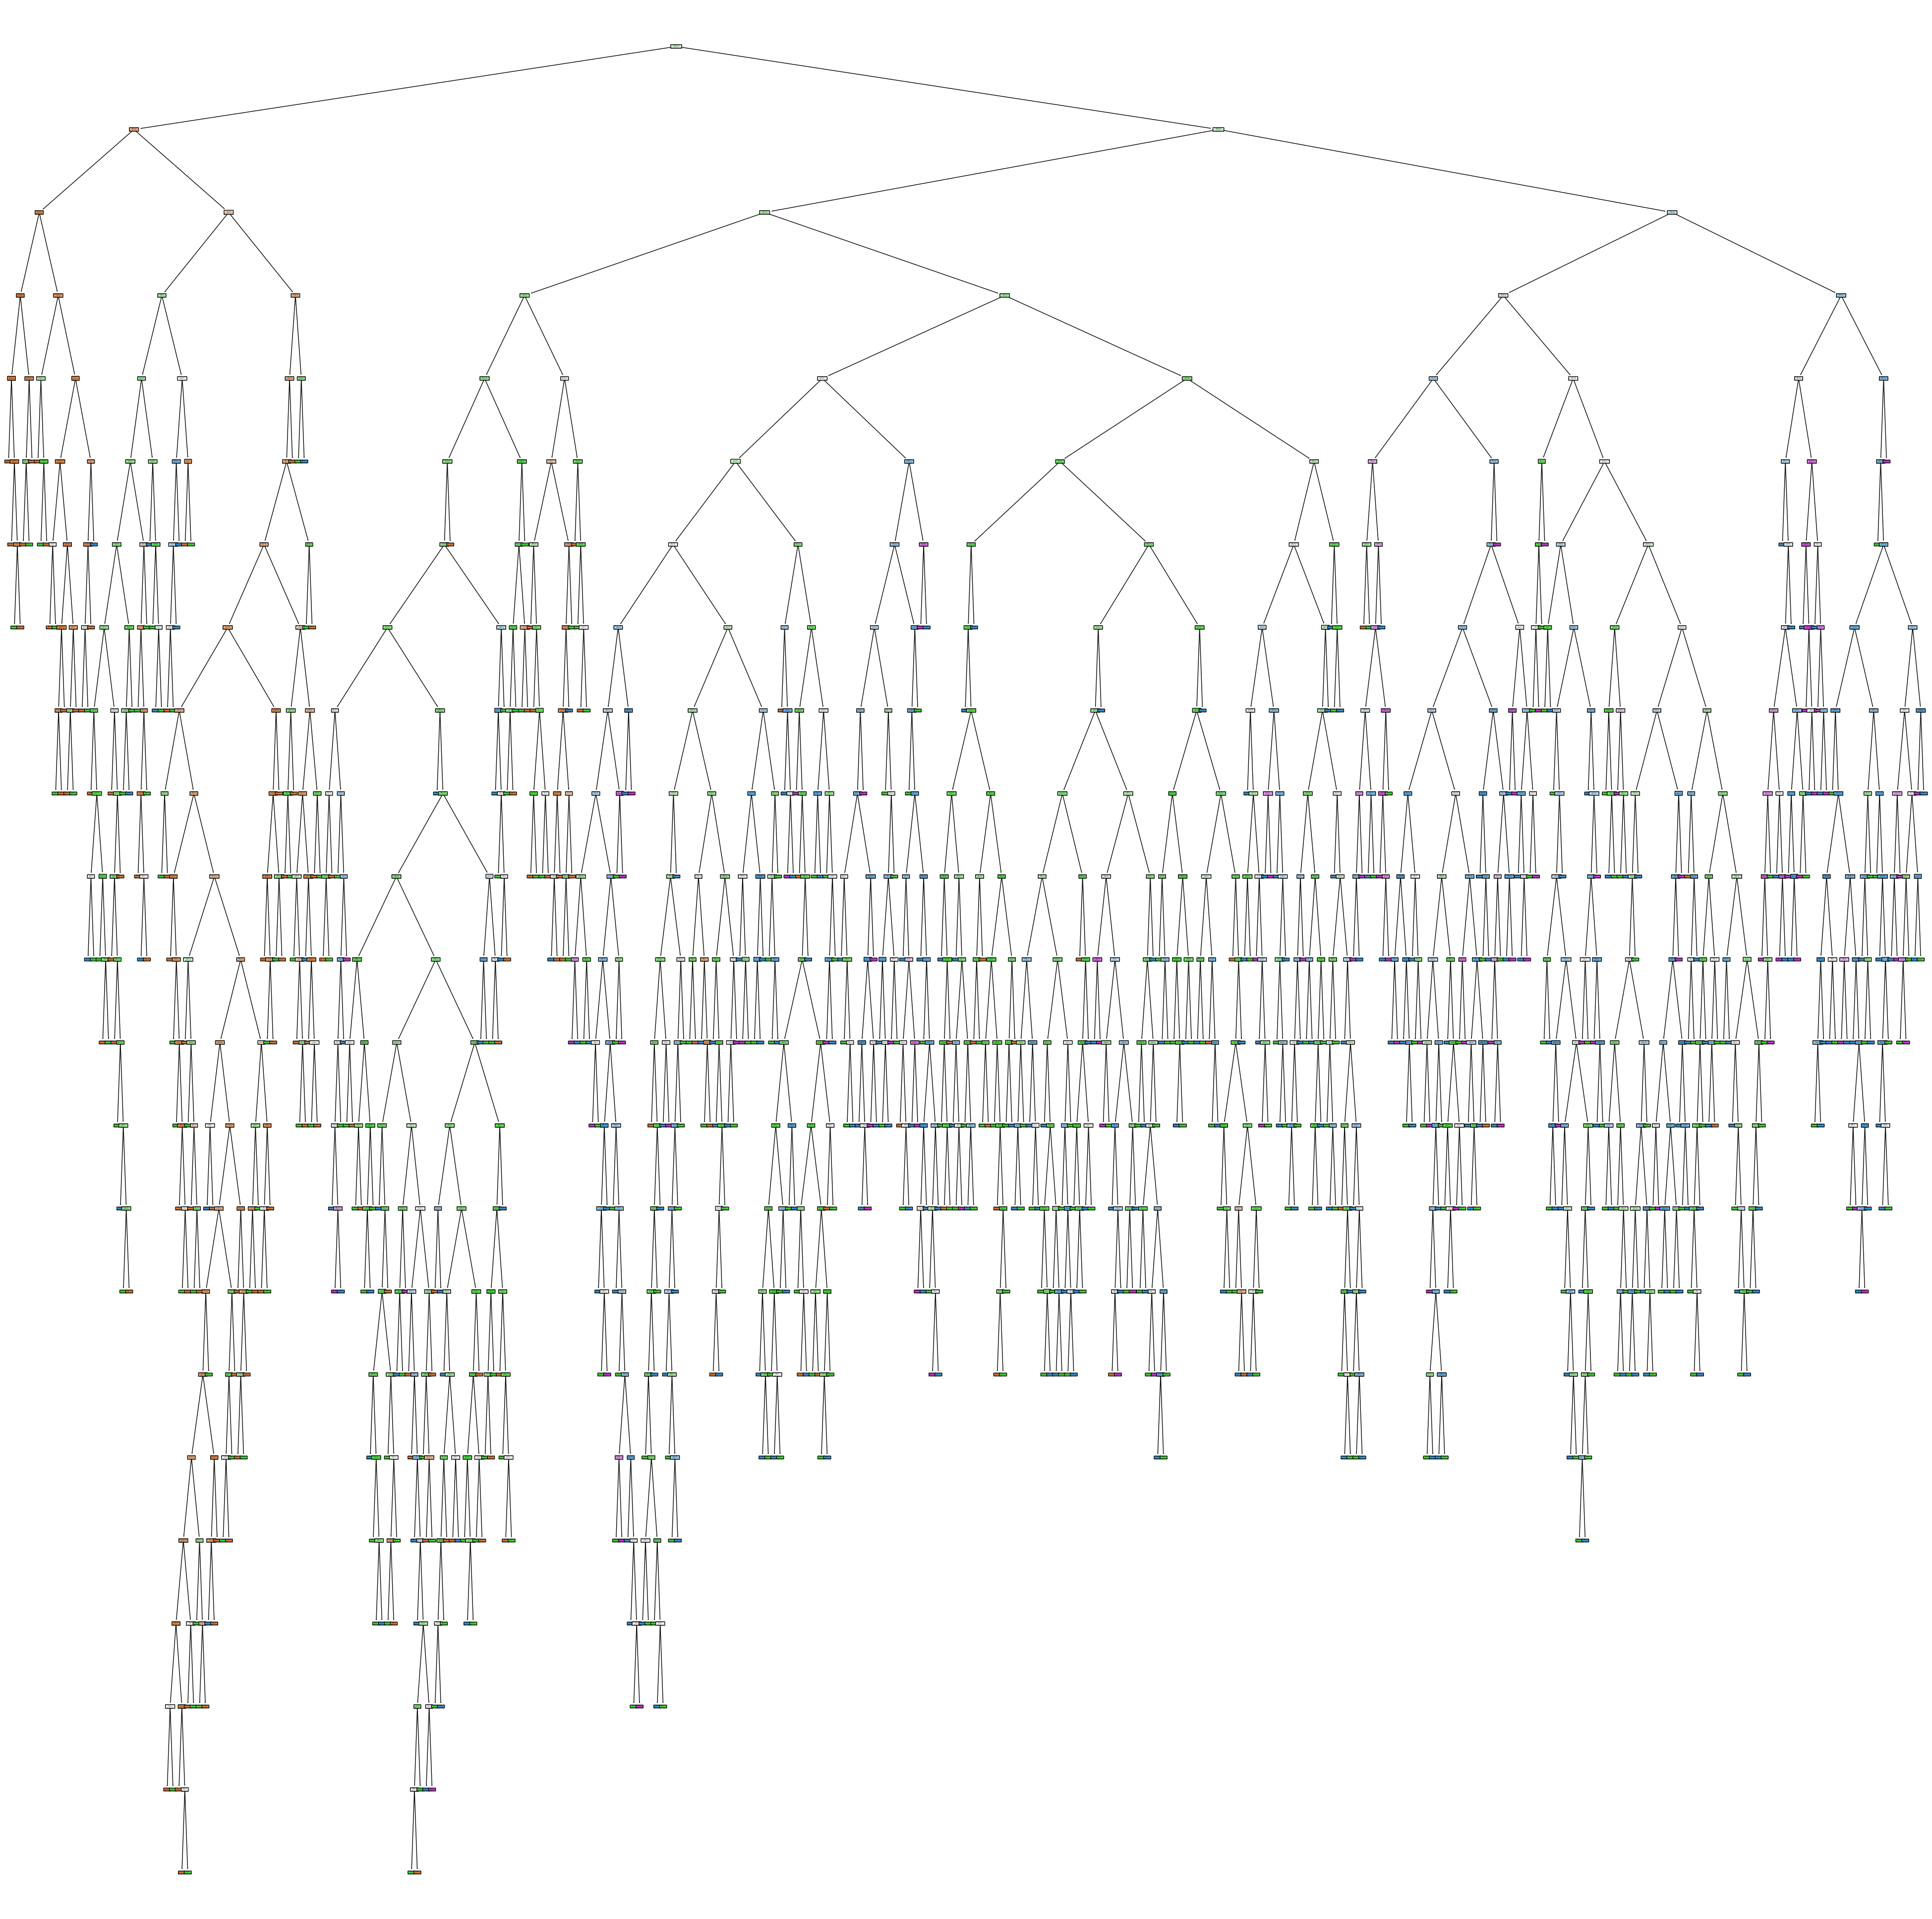

In [15]:
plt.figure(figsize = (50,50))
plot_tree(fdt, filled = True, rounded = True,class_names= ['Class 1','Class 2','Class 3','Class 4'],feature_names = x.columns)
plt.savefig('uptree.png')

In [16]:
ypred = fdt.predict(xtest)
confusion_matrix(ytest, ypred)

array([[229, 118,  16,   2],
       [ 91, 417, 218,  26],
       [ 11, 200, 217,  34],
       [  1,  25,  38,  28]], dtype=int64)

In [17]:
fdt.score(xtest, ytest)

0.533213644524237

In [18]:
cross_val_score(fdt, x , y, cv = 10).mean()

0.5381839982559408

The unpruned full desion tree has a cross validated accuracy of 53.81%

In [19]:
f1_score(ytest, ypred,average = 'weighted')

0.534878899219231

### Pruning of Decision Tree

#### Pre - Pruning of Decision Tree

In [20]:
max_depth_range = list(range(1, 10))
accuracy = []
for depth in max_depth_range:    
    clf = DecisionTreeClassifier(criterion='gini',max_depth = depth,random_state = 42)
    clf.fit(xtrain, ytrain)
    score = cross_val_score(clf, x , y, cv = 10).mean()
    accuracy.append([depth,score])
    dep = pd.DataFrame(data = accuracy, columns = ['Depth', 'Accuracy'])

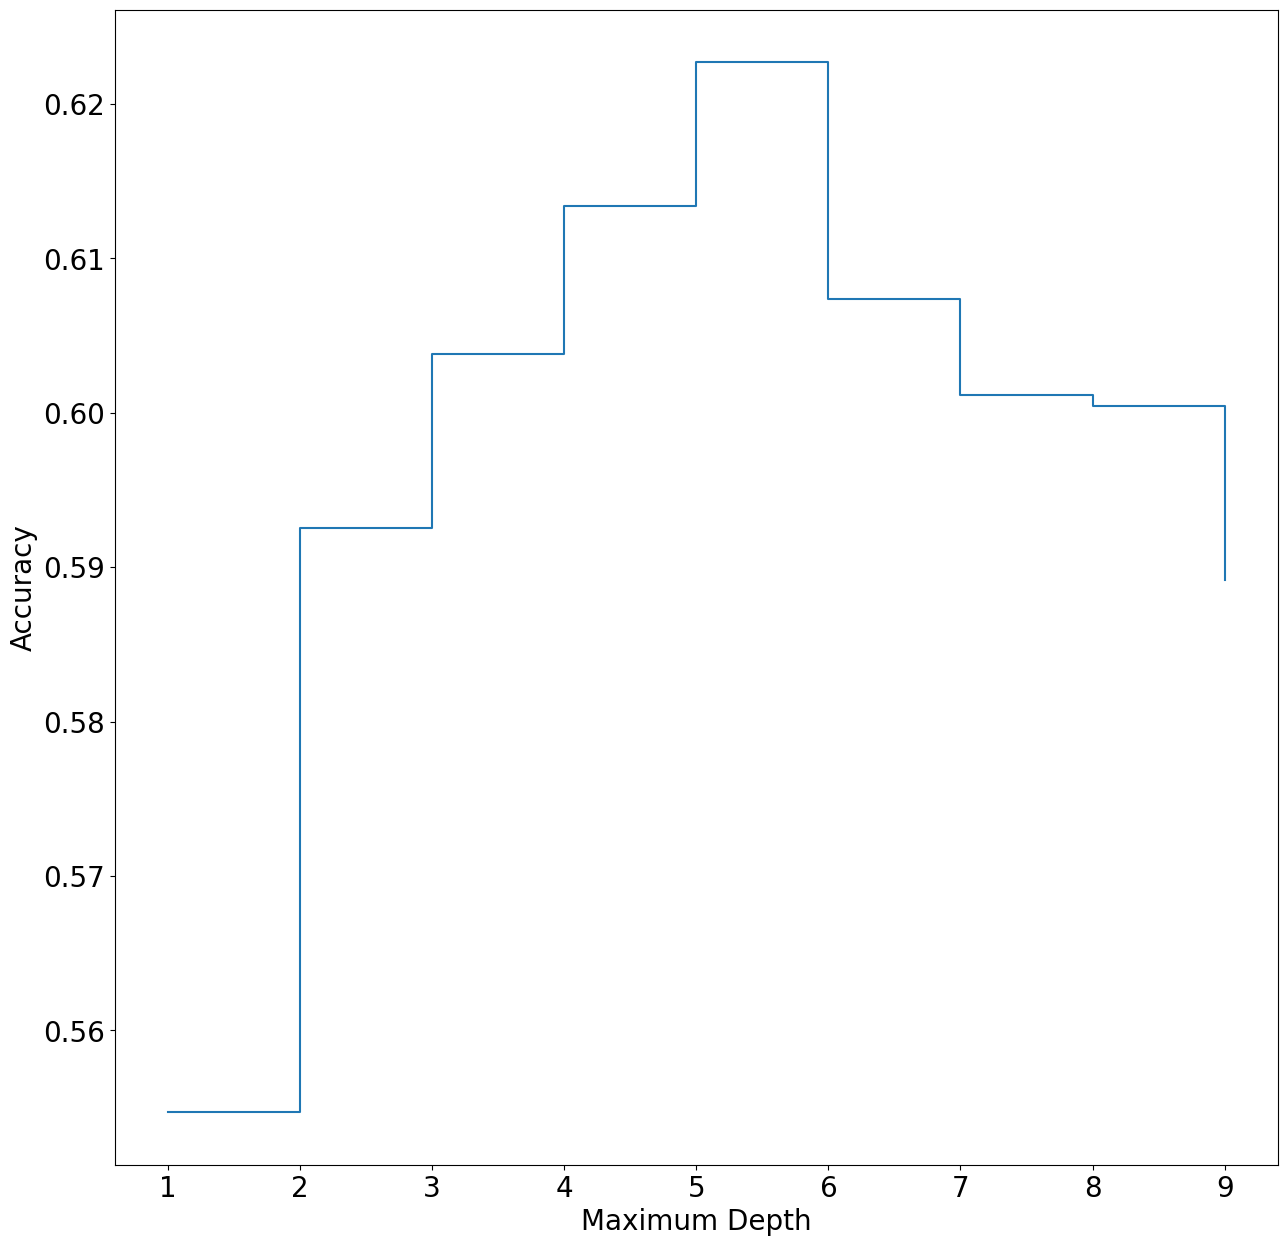

In [21]:
fig, ax =plt.subplots()
ax.set_xlabel('Maximum Depth')
ax.set_ylabel('Accuracy')
ax.plot(dep['Depth'],dep['Accuracy'],drawstyle="steps-post")
plt.savefig('dtmax.png')

In [22]:
deps = dep.sort_values(by=['Accuracy'],ascending=False)
dtd = deps.iloc[0,0]
dtd

5

The pre-pruned tree of maximum depth of 5 has the highest accuracy

In [23]:
clf = DecisionTreeClassifier(criterion='gini',max_depth = dtd,random_state = 42)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, random_state=42)

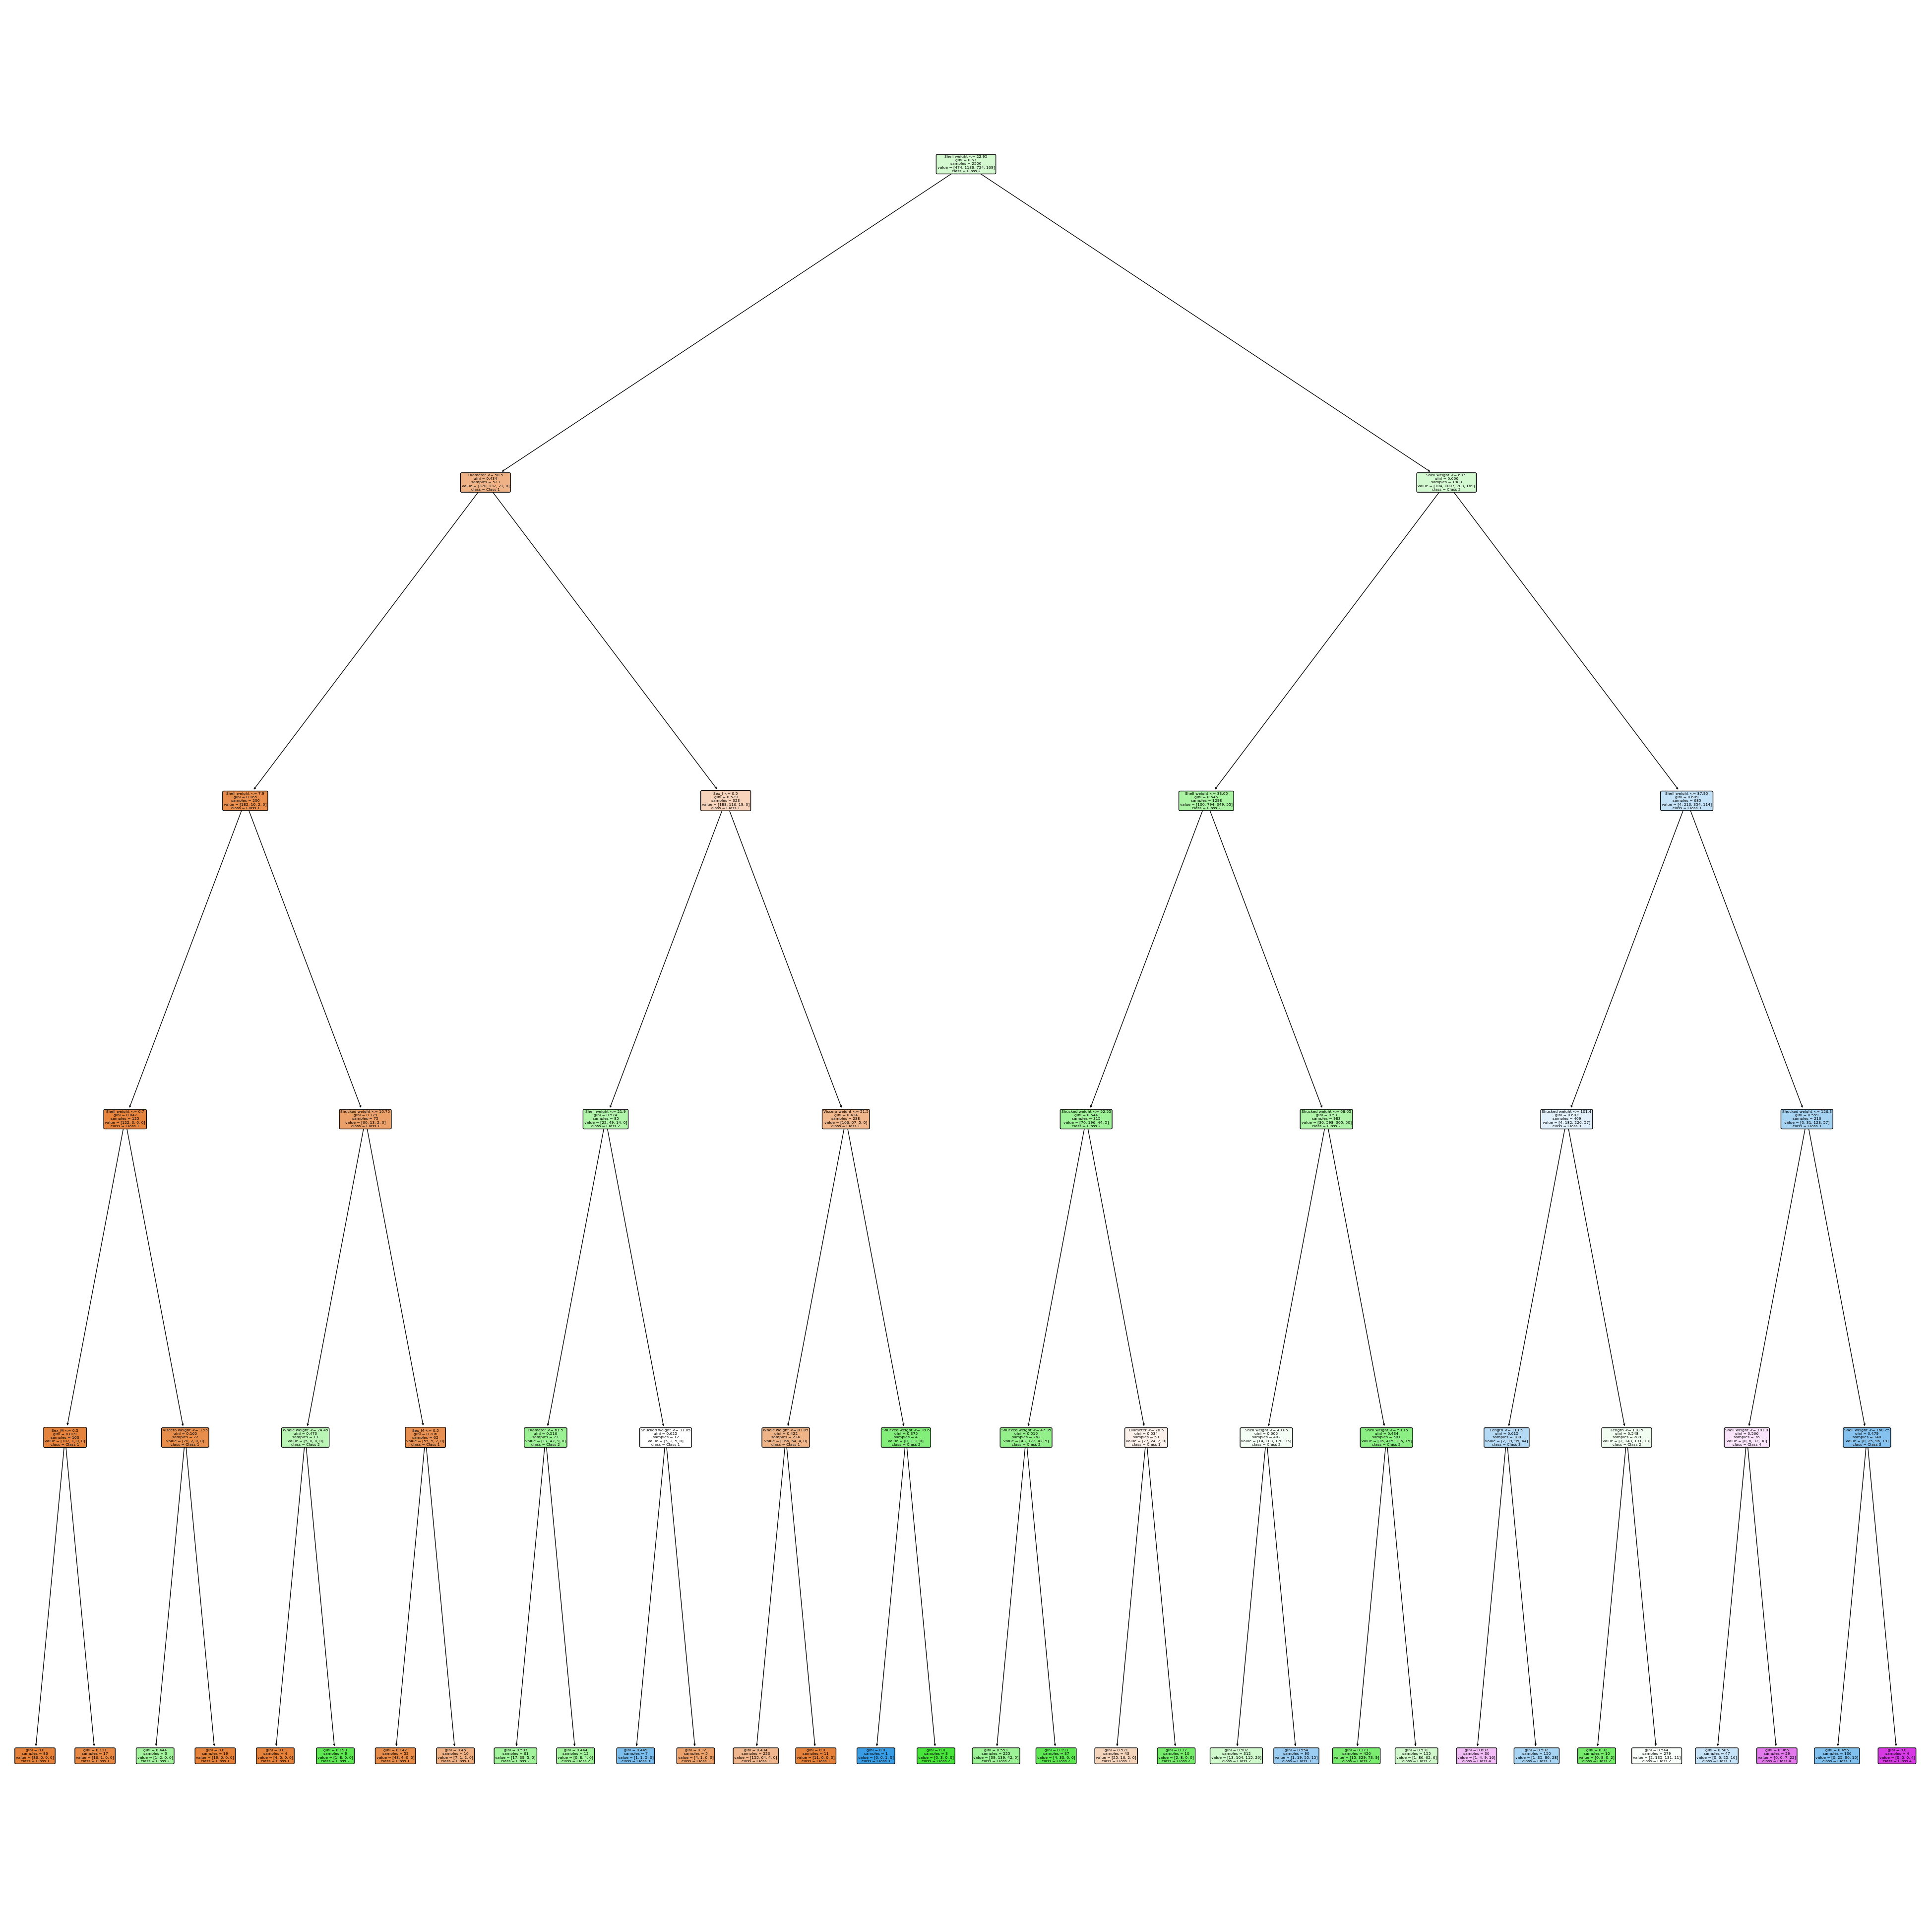

In [24]:
plt.figure(figsize = (50,50))
plot_tree(clf, filled = True, rounded = True,class_names= ['Class 1','Class 2','Class 3','Class 4'],feature_names = x.columns)
plt.savefig('preptree.png')

In [25]:
ypred = clf.predict(xtest)
confusion_matrix(ytest, ypred)

array([[251, 113,   0,   1],
       [ 66, 604,  78,   4],
       [ 10, 287, 152,  13],
       [  0,  28,  51,  13]], dtype=int64)

In [26]:
clf.score(xtest,ytest)

0.6104129263913824

In [27]:
cross_val_score(clf, x , y, cv = 10).mean()

0.6226917030968526

In [28]:
f1_score(ytest, ypred,average = 'weighted')

0.5879476056152971

The pre- runed decision tree has an cross validated accuracy of 62.26%

#### Post - Pruning of Decision Tree

In [29]:
path = fdt.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
daas =[]
for ccp_alpha in ccp_alphas:
    daa = DecisionTreeClassifier(random_state= 42,ccp_alpha = ccp_alpha)
    daa.fit(xtrain, ytrain)
    daas.append(daa)

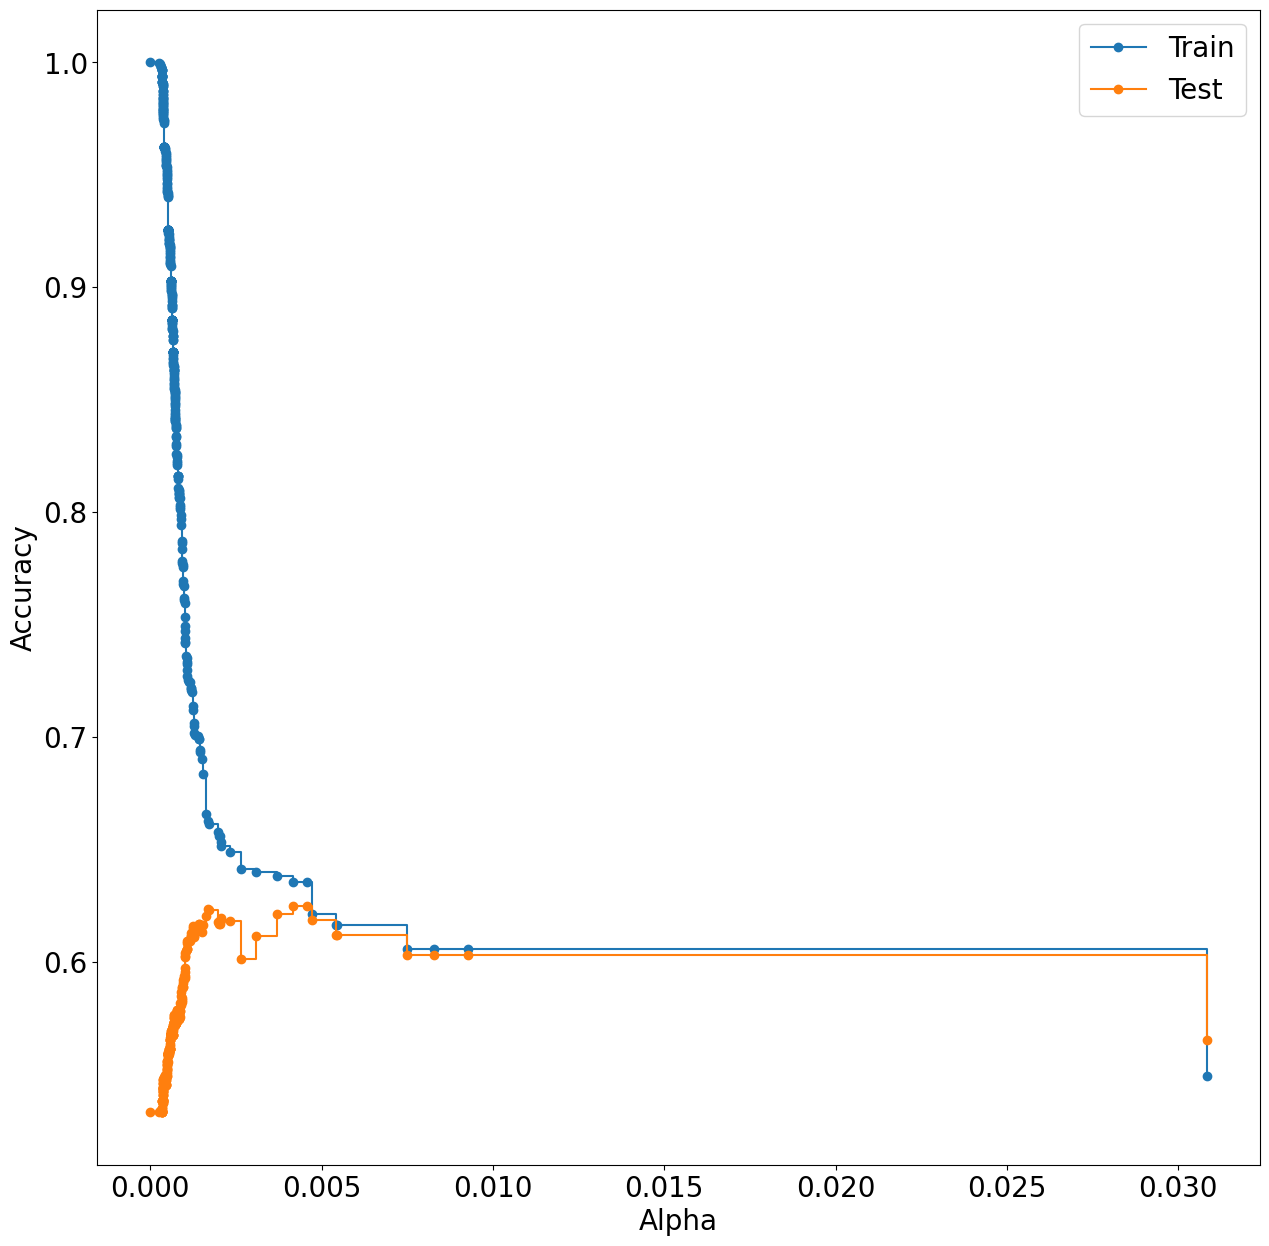

In [30]:
trs = [daa.score(xtrain, ytrain) for daa in daas]
tts = [daa.score(xtest, ytest) for daa in daas]   
fig, ax =plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.plot(ccp_alphas, trs,marker ='o', drawstyle="steps-post", label = 'Train')
ax.plot(ccp_alphas, tts,marker ='o', drawstyle="steps-post", label = 'Test')
ax.legend()
plt.savefig('dttetr.png')

In [31]:
daa = DecisionTreeClassifier(random_state= 42,ccp_alpha = 0.0016898492602223005)
scores = cross_val_score(daa, x , y, cv = 10)
val = pd.DataFrame(data = {'Tree':range(10), 'Acurracy':scores})

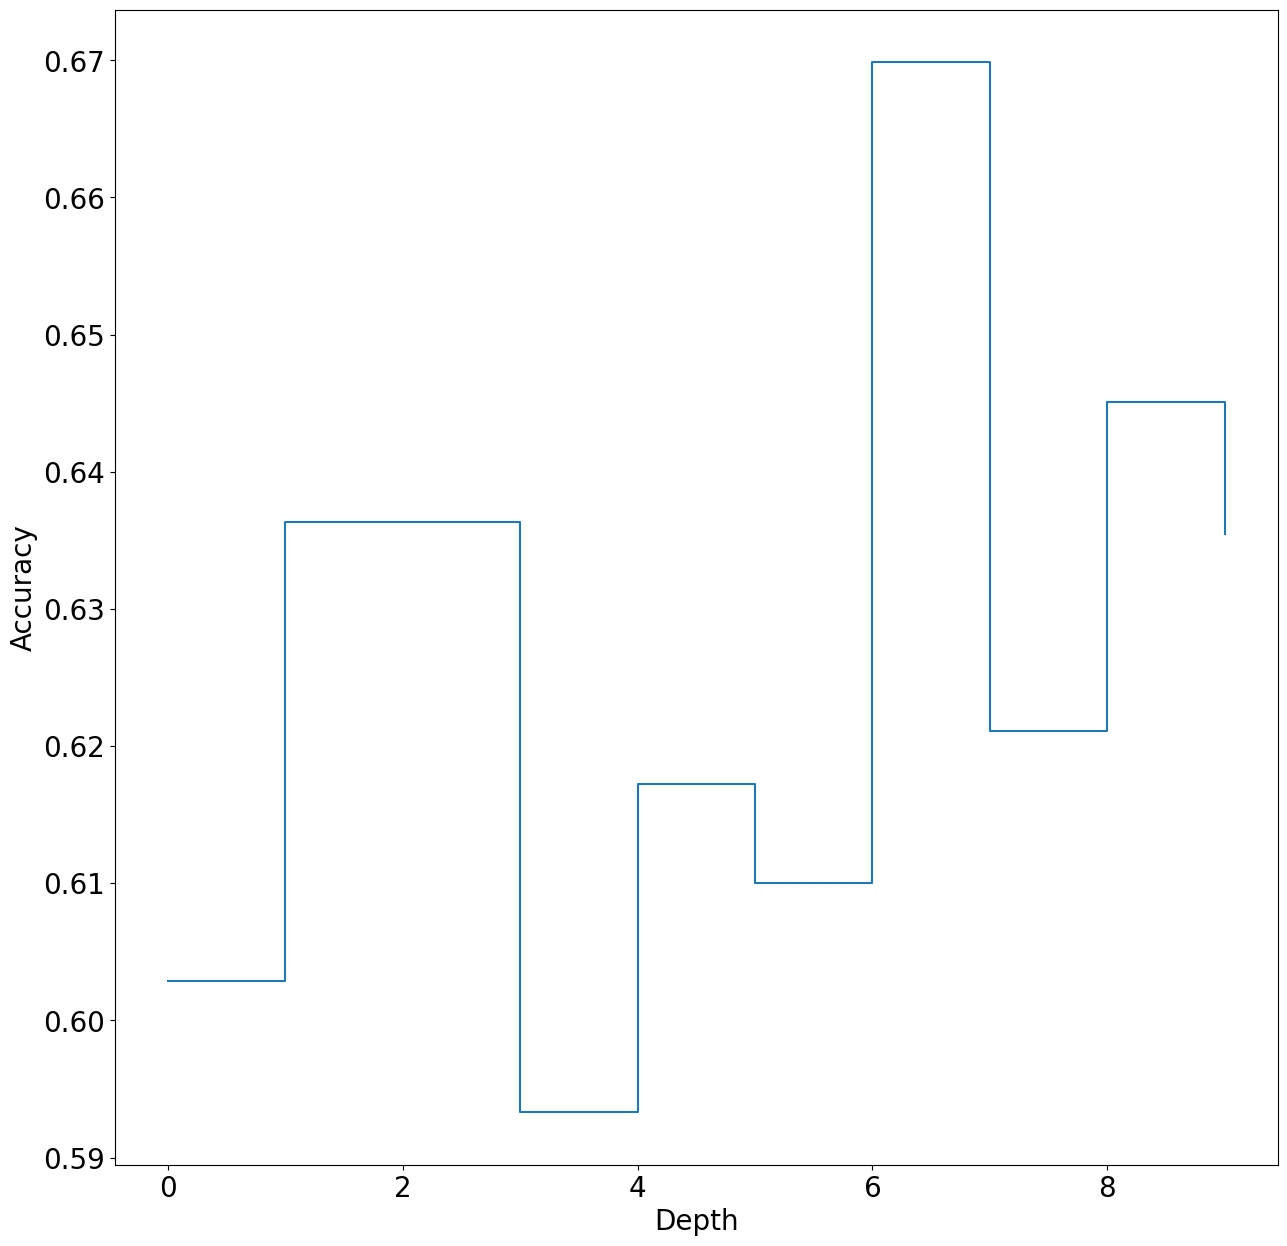

In [32]:
fig, ax =plt.subplots()
ax.set_xlabel('Depth')
ax.set_ylabel('Accuracy')
ax.plot(val['Tree'],val['Acurracy'],drawstyle="steps-post")

In [33]:
alv = []
for ccp_alpha in ccp_alphas:
    daa = DecisionTreeClassifier(random_state= 42,ccp_alpha = ccp_alpha)
    scores = cross_val_score(daa, x , y, cv = 10)
    alv.append([ccp_alpha,np.mean(scores),np.std(scores)])
adf = pd.DataFrame(data = alv, columns = ['Alpha', 'Mean Score', 'Std Score'])

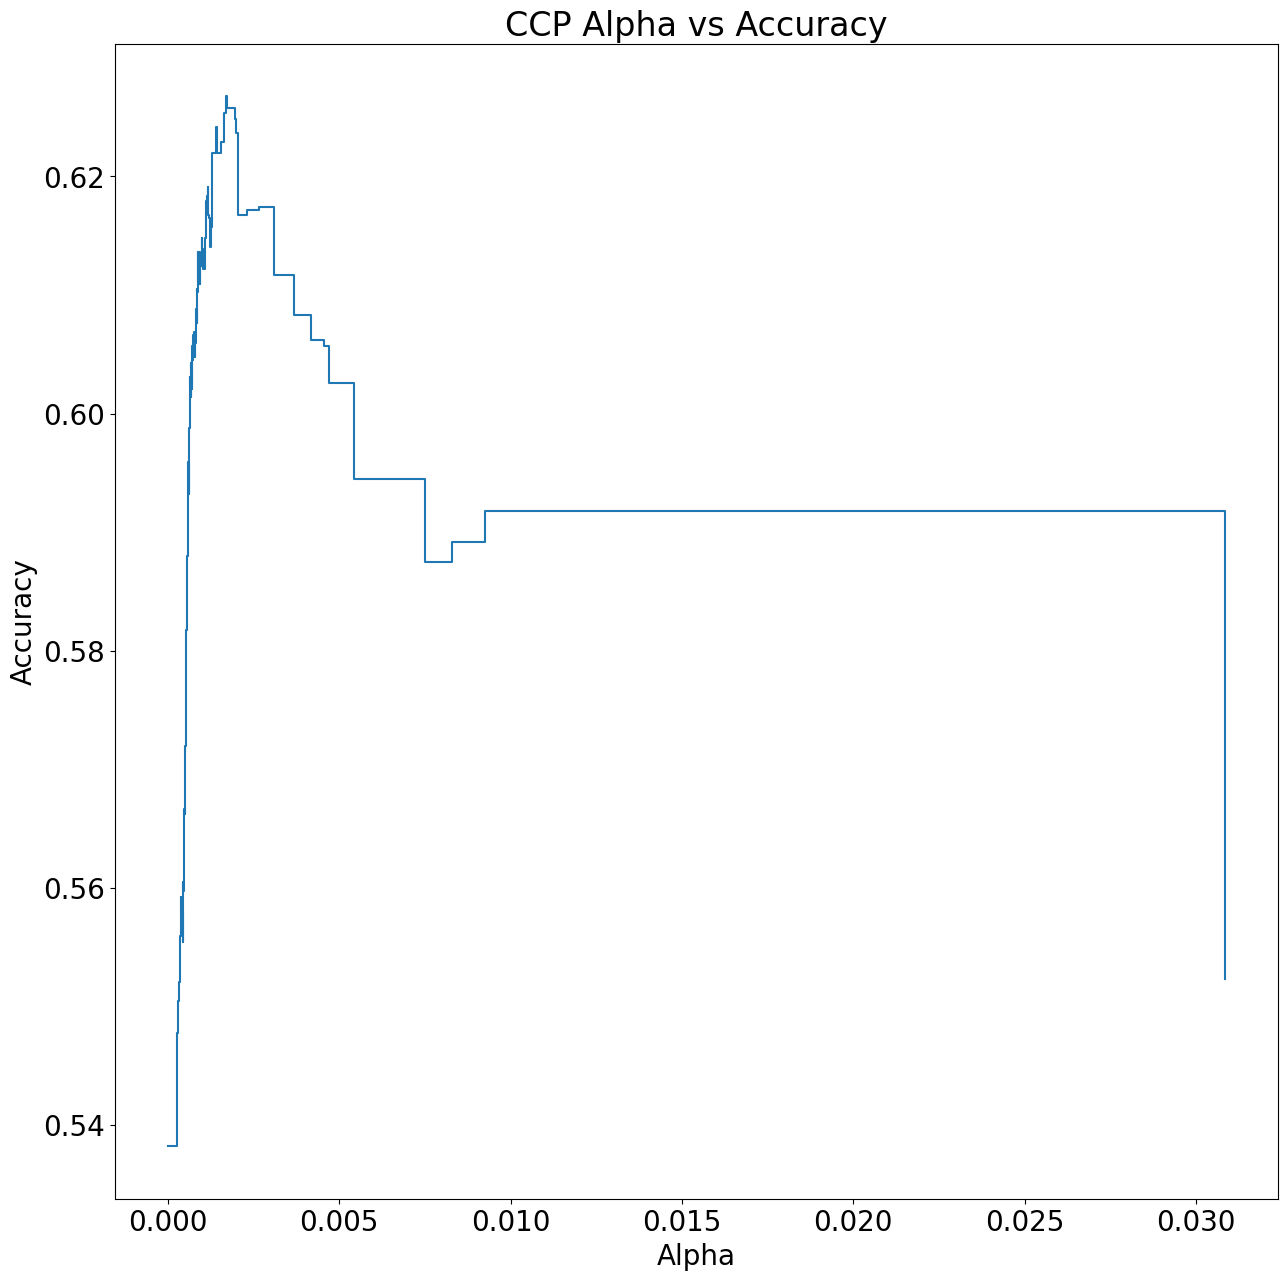

In [34]:
fig, ax =plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.plot(adf['Alpha'],adf['Mean Score'],drawstyle="steps-post")
ax.set_title('CCP Alpha vs Accuracy')
plt.savefig('alpadt.png')

In [35]:
adf = adf.sort_values(by=['Mean Score'],ascending=False)
ida = adf.iloc[0,0]
ida

0.0016898492602223005

The post-pruned tree with a ccp alpha value of 0.000835 has the highest accuracy

In [36]:
pdt = DecisionTreeClassifier(random_state= 42,criterion='gini',ccp_alpha = ida)
pdt.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0016898492602223005, random_state=42)

In [37]:
ypred = pdt.predict(xtest)
confusion_matrix(ytest, ypred)

array([[267,  93,   4,   1],
       [ 75, 582,  90,   5],
       [ 10, 260, 178,  14],
       [  0,  27,  50,  15]], dtype=int64)

In [38]:
pdt.score(xtest, ytest)

0.6235786953919809

In [39]:
cross_val_score(pdt, x , y, cv = 10).mean()

0.6267707365208313

The post- runed decision tree has an cross validated accuracy of 62.67%

In [40]:
f1_score(ytest, ypred,average = 'weighted')

0.6068534514982853

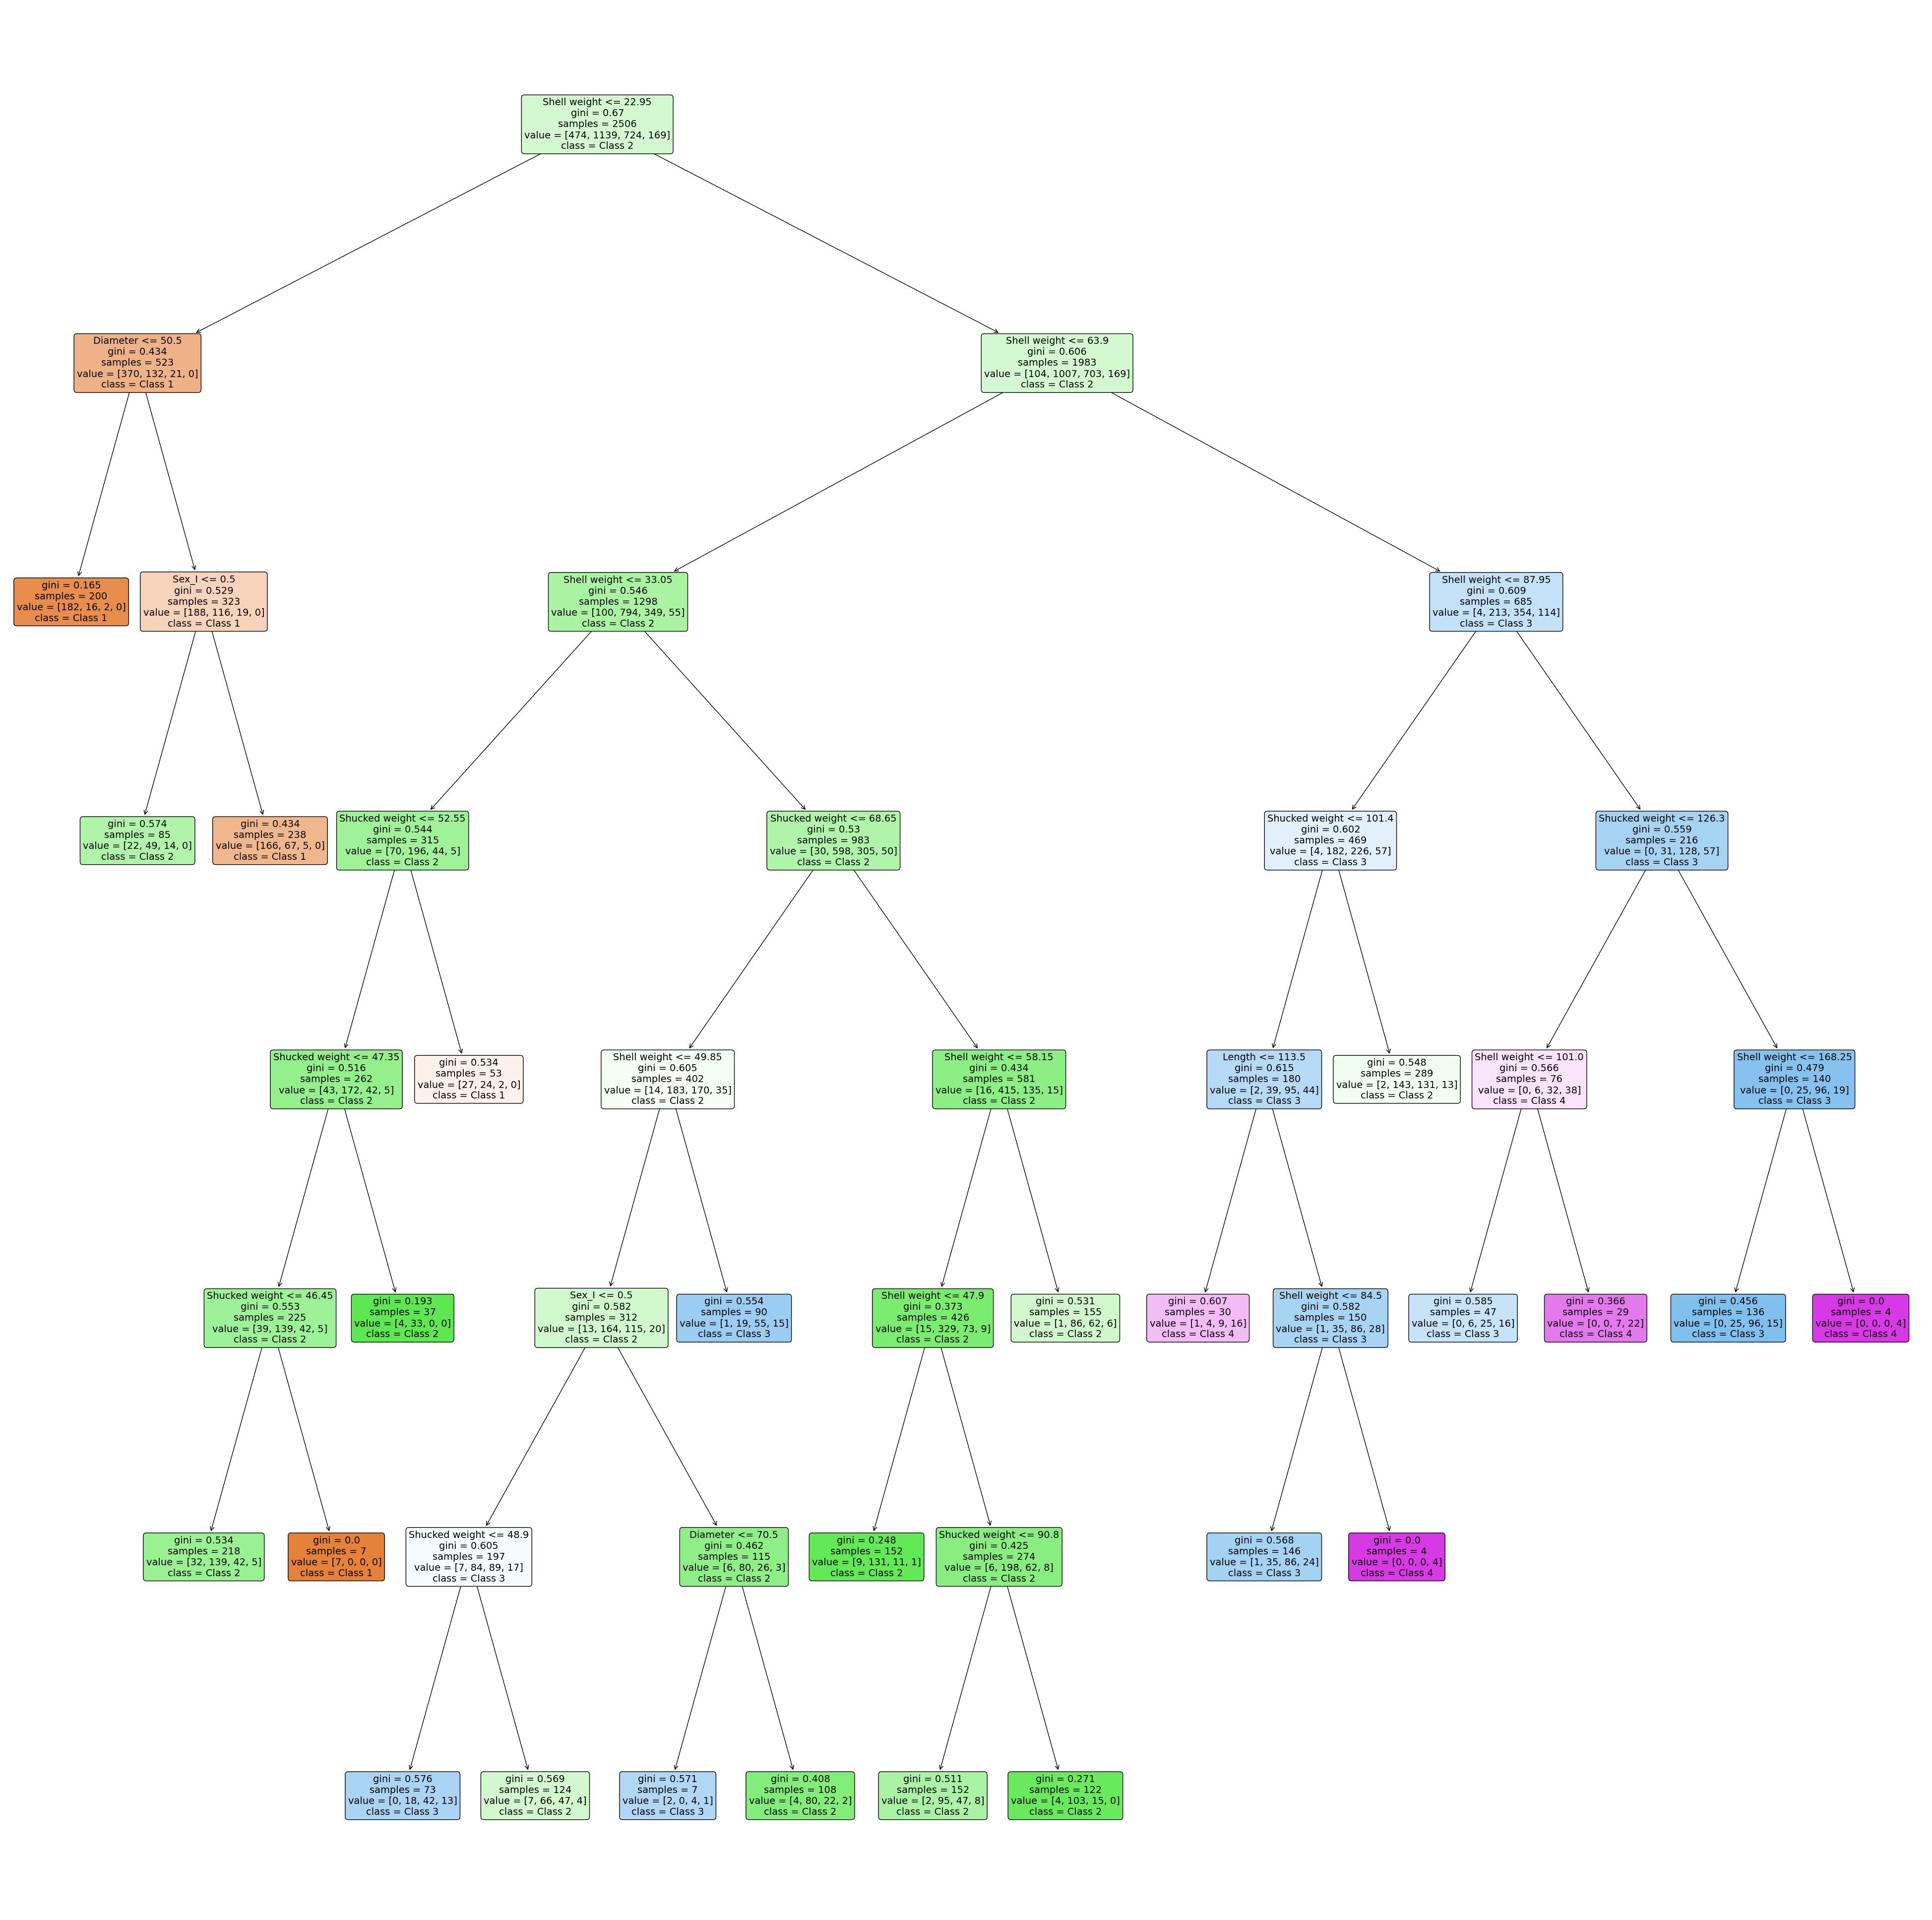

In [41]:
plt.figure(figsize = (50,50))
plot_tree(pdt, filled = True, rounded = True,class_names= ['Class 1','Class 2','Class 3','Class 4'],feature_names = x.columns,fontsize = 14)
plt.savefig('ptree.png')

## Extra Tree Classifier

In [42]:
ext = ExtraTreeClassifier(criterion='gini',random_state= 42)
ext.fit(xtrain, ytrain)

ExtraTreeClassifier(random_state=42)

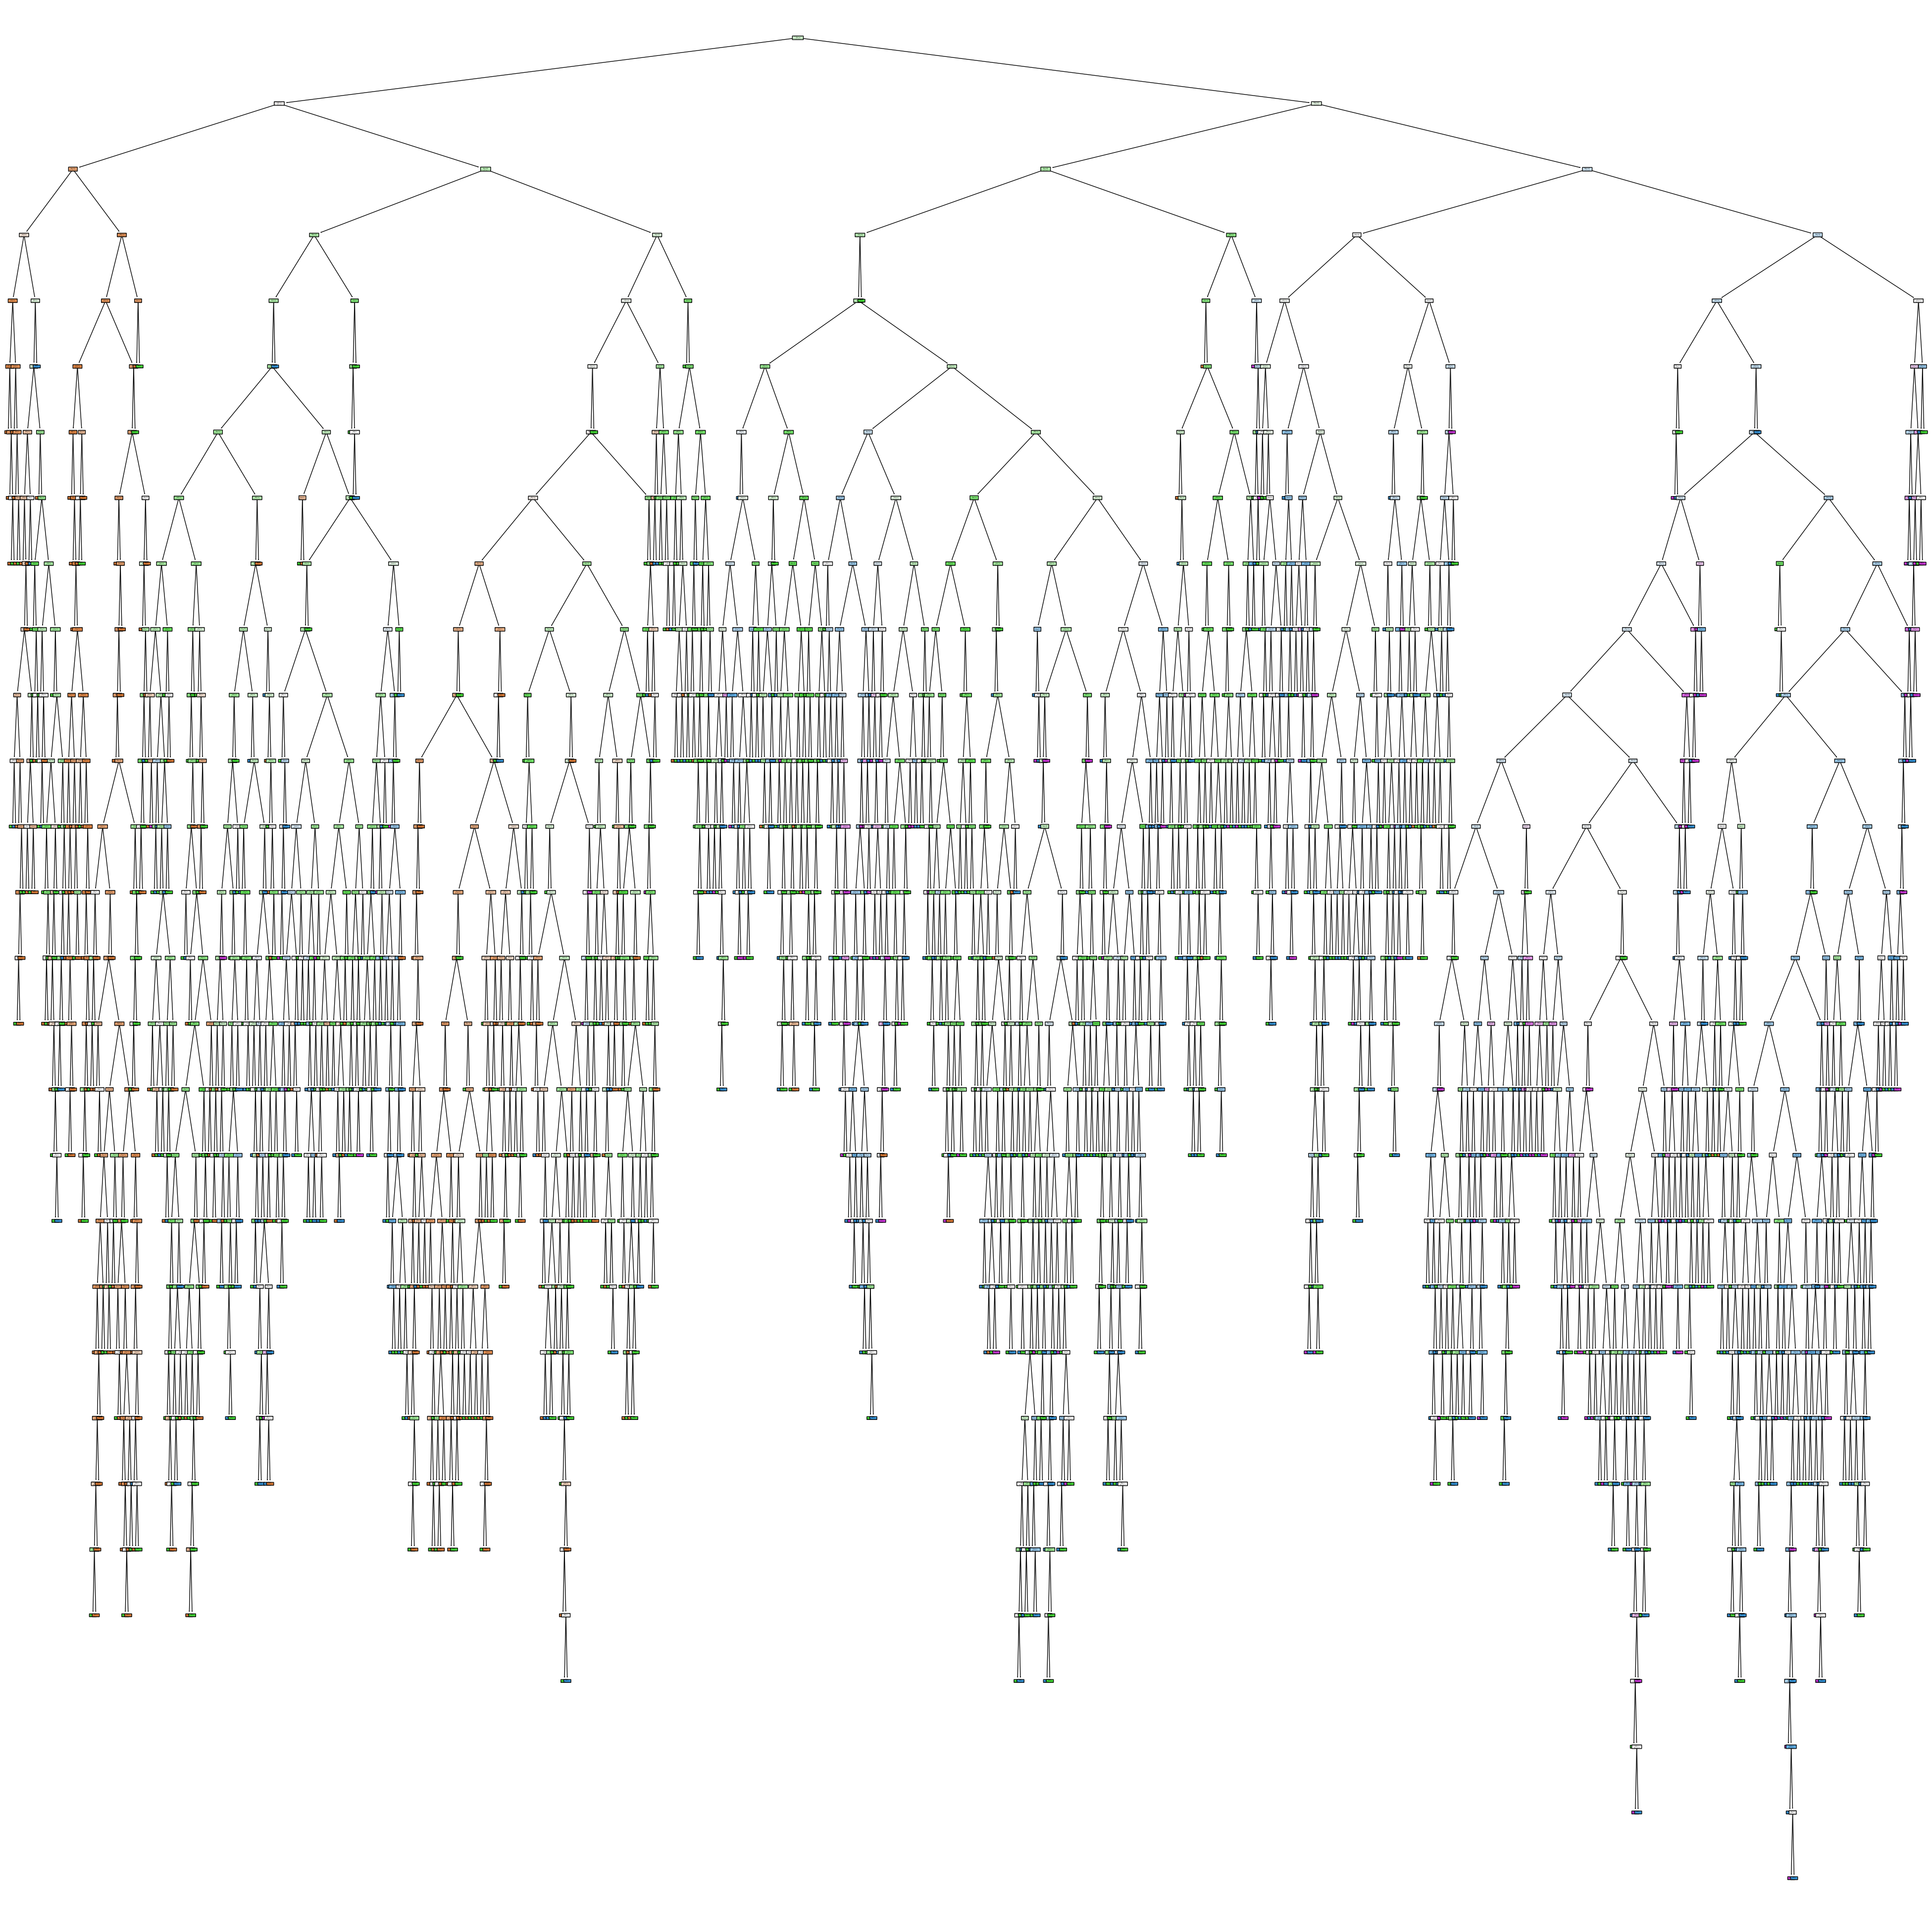

In [43]:
plt.figure(figsize = (50,50))
plot_tree(ext, filled = True, rounded = True,class_names= ['Class 1','Class 2','Class 3','Class 4'],feature_names = x.columns)
plt.savefig('upextr.png')

In [44]:
ypred = ext.predict(xtest)
confusion_matrix(ytest, ypred)

array([[230, 117,  17,   1],
       [ 76, 462, 186,  28],
       [ 13, 194, 194,  61],
       [  1,  19,  57,  15]], dtype=int64)

In [45]:
ext.score(xtest, ytest)

0.5391980849790544

In [46]:
cross_val_score(ext, x , y, cv = 10).mean()

0.5283908758160936

In [47]:
f1_score(ytest, ypred,average = 'weighted')

0.5414991337895664

The unpruned full extra tree classifier has a cross validated accuracy of 52.84%

### Pruning of Extra Tree Classifier

#### Pre - Pruning of Extra Tree Classifier

In [48]:
max_depth_range = list(range(1, 30))
accuracy = []
for depth in max_depth_range:    
    extp = ExtraTreeClassifier(criterion='gini',max_depth = depth,random_state = 42)
    extp.fit(xtrain, ytrain)
    score = extp.score(xtest, ytest)
    accuracy.append([depth,score])
    dep = pd.DataFrame(data = accuracy, columns = ['Depth', 'Accuracy'])

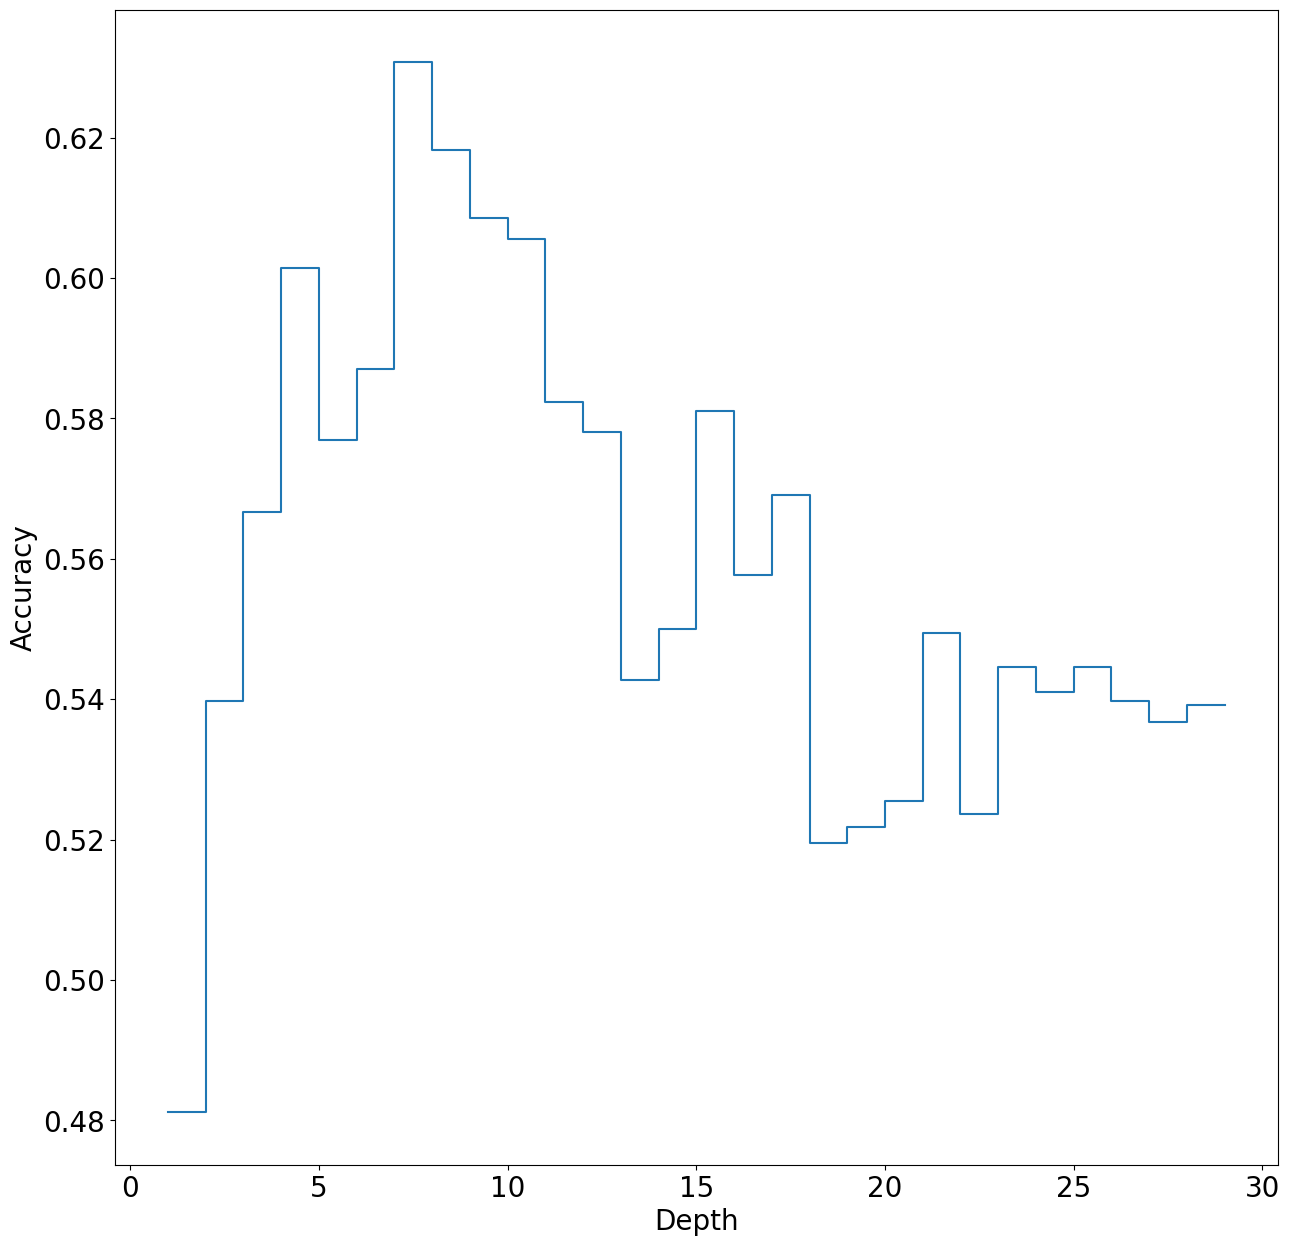

In [49]:
fig, ax =plt.subplots()
ax.set_xlabel('Depth')
ax.set_ylabel('Accuracy')
ax.plot(dep['Depth'],dep['Accuracy'],drawstyle="steps-post")
plt.show()

In [50]:
nn1a = dep.sort_values(by=['Accuracy'],ascending=False)
extd = nn1a.iloc[0,0]
extd

7

The pre-pruned tree of maximum depth of 7 has the highest accuracy

In [51]:
extp = ExtraTreeClassifier(criterion='gini',max_depth = extd,random_state = 42)
extp.fit(xtrain, ytrain)

ExtraTreeClassifier(max_depth=7, random_state=42)

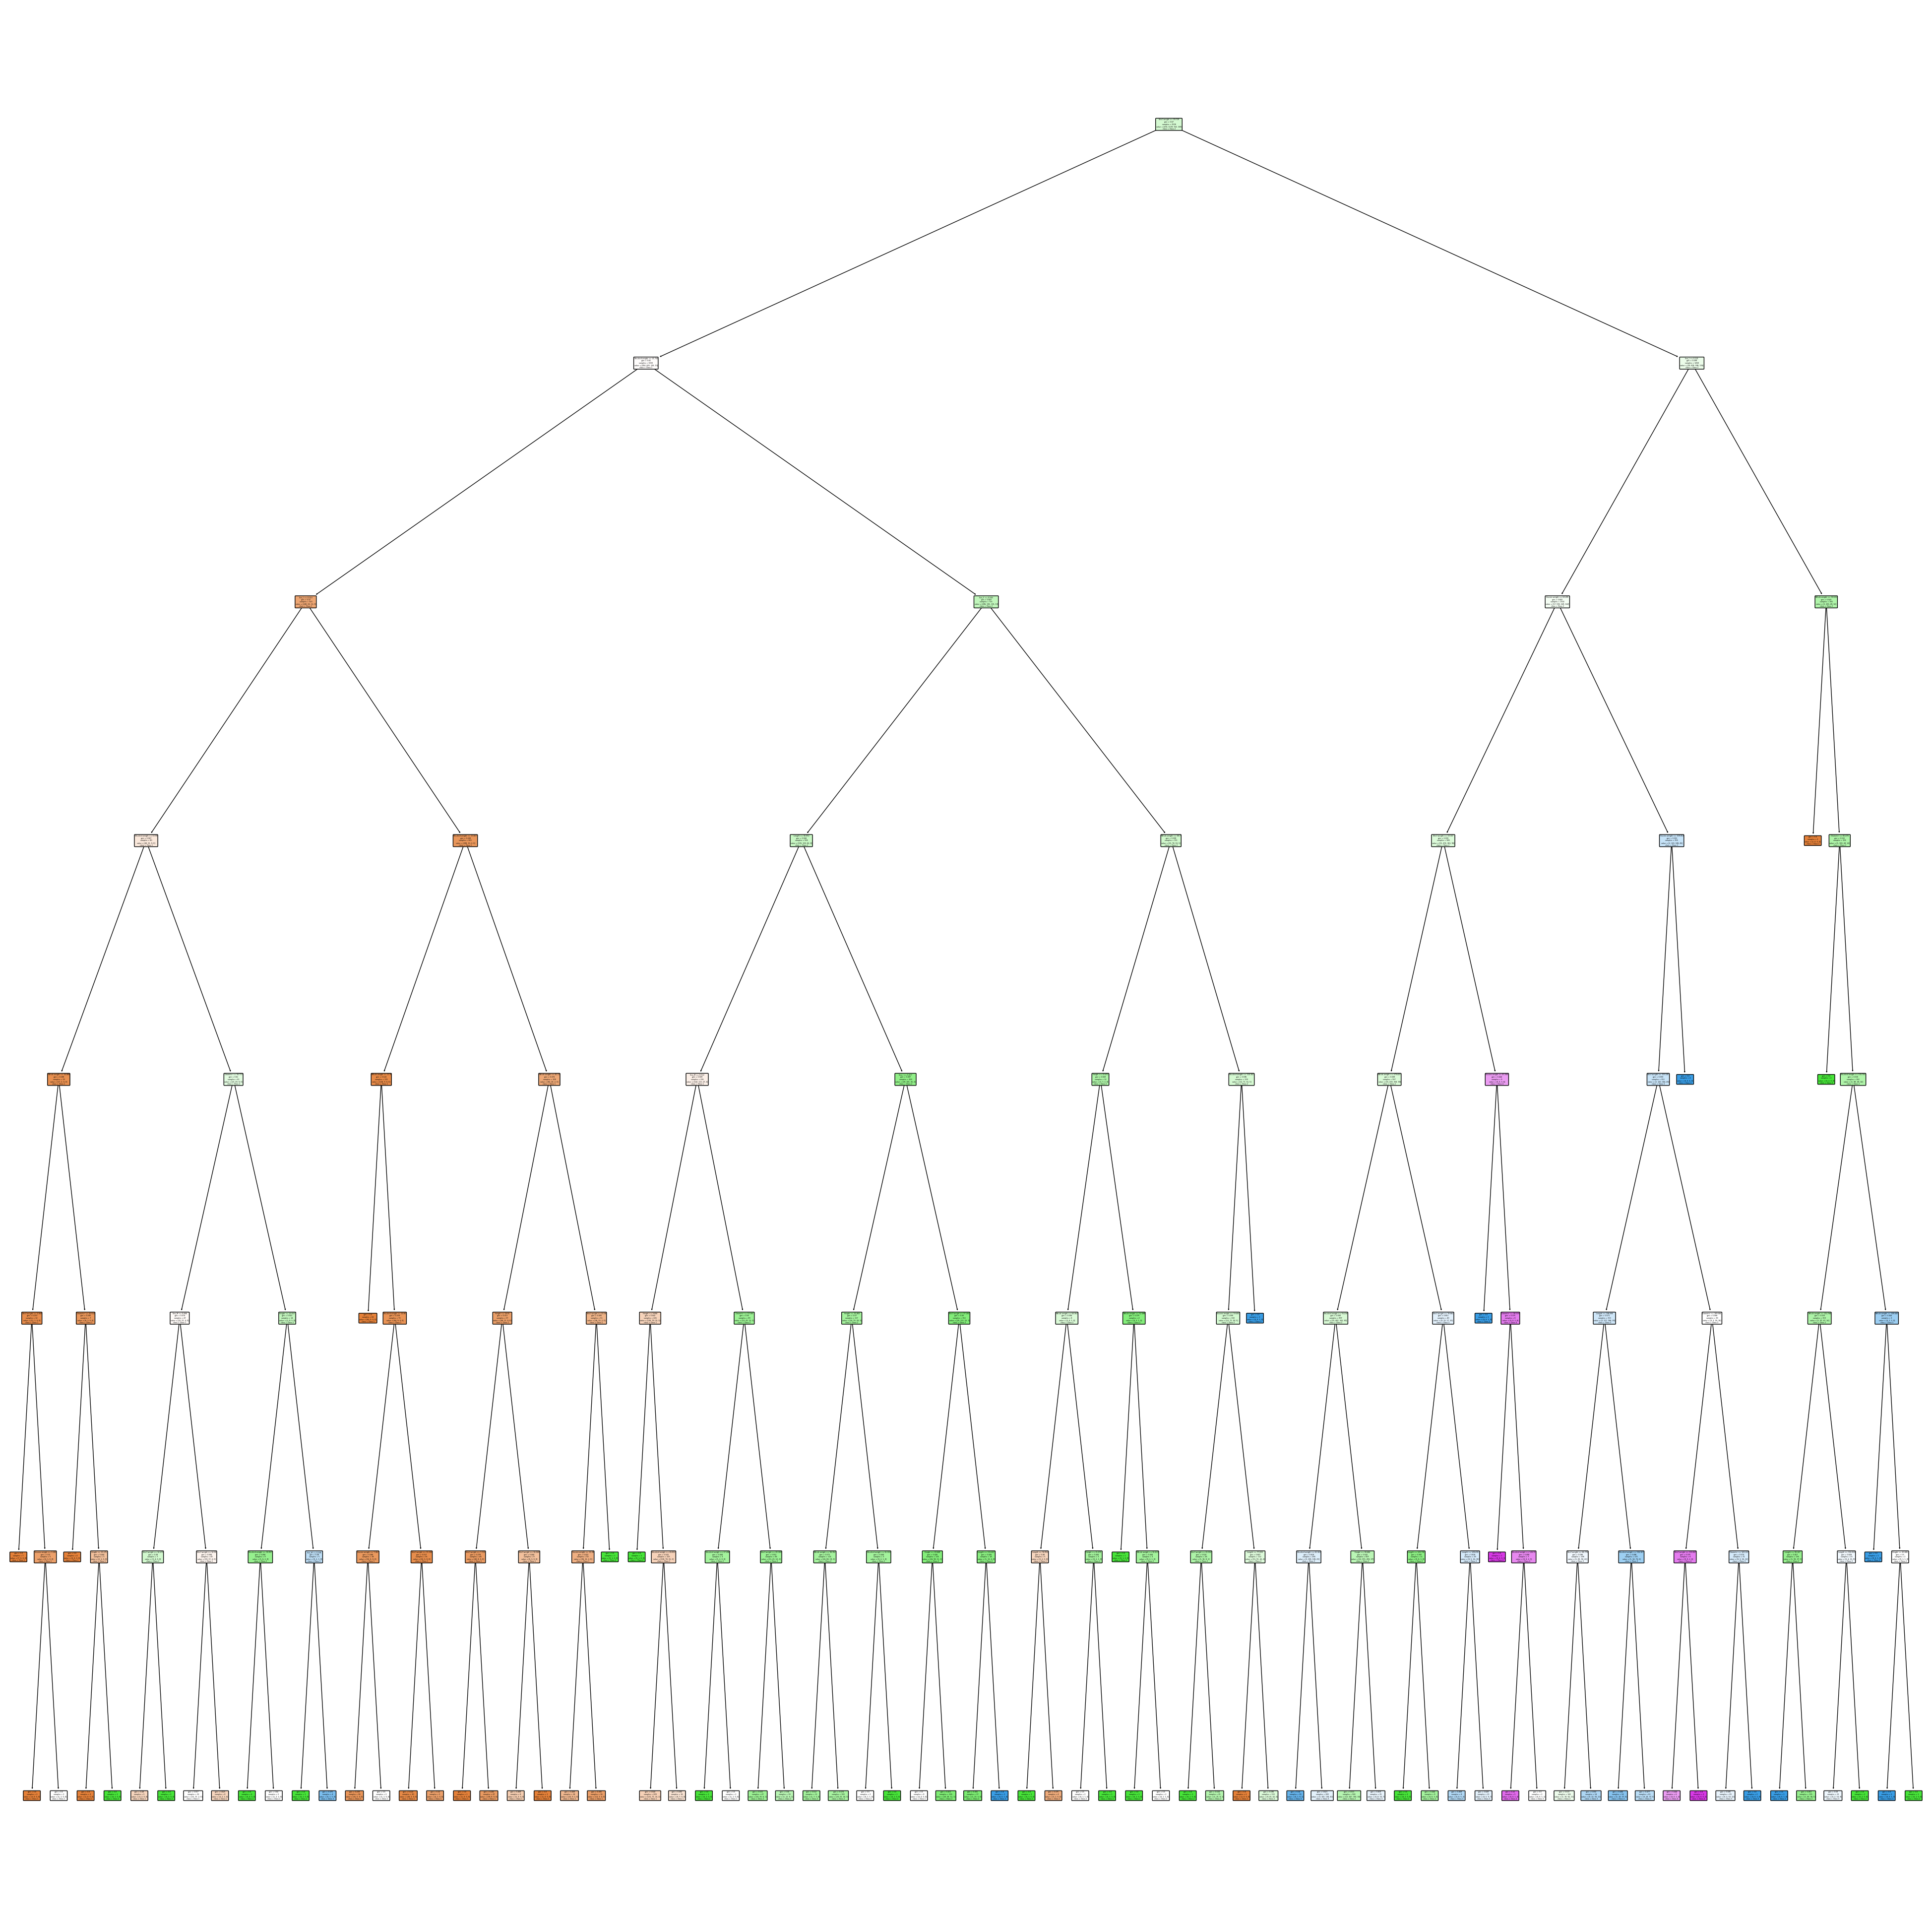

In [52]:
plt.figure(figsize = (50,50))
plot_tree(extp, filled = True, rounded = True,class_names= ['Class 1','Class 2','Class 3','Class 4'],feature_names = x.columns)
plt.savefig('ppextr.png')

In [53]:
ypred = extp.predict(xtest)
confusion_matrix(ytest, ypred)

array([[281,  82,   2,   0],
       [ 77, 558, 117,   0],
       [ 14, 236, 211,   1],
       [  2,  29,  57,   4]], dtype=int64)

In [54]:
extp.score(xtest, ytest)

0.6307600239377619

In [55]:
cross_val_score(extp, x , y, cv = 10).mean()

0.5930111413261734

In [56]:
f1_score(ytest, ypred,average = 'weighted')

0.6111799987579517

The pre - pruned extra tree classifier has a cross validated accuracy of 59.3%

#### Post - Pruning of Extra Tree Classifier

In [57]:
path = ext.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
daas =[]
for ccp_alpha in ccp_alphas:
    daa = ExtraTreeClassifier(random_state= 42,ccp_alpha = ccp_alpha)
    daa.fit(xtrain, ytrain)
    daas.append(daa)

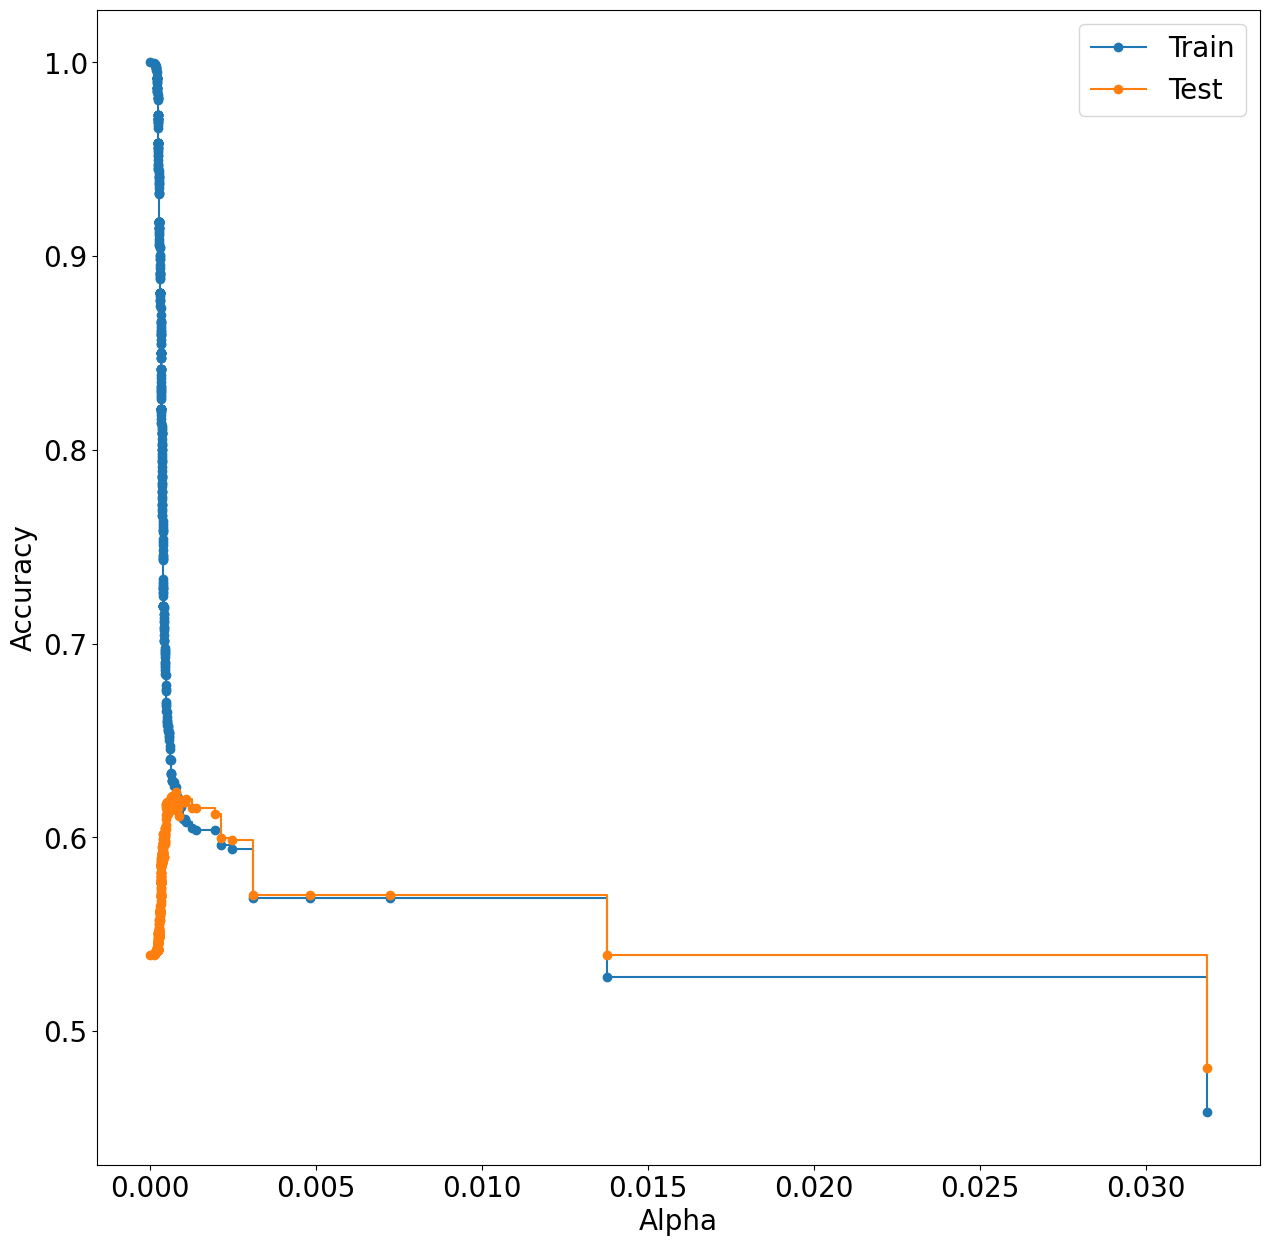

In [58]:
trs = [daa.score(xtrain, ytrain) for daa in daas]
tts = [daa.score(xtest, ytest) for daa in daas]   
fig, ax =plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.plot(ccp_alphas, trs,marker ='o', drawstyle="steps-post", label = 'Train')
ax.plot(ccp_alphas, tts,marker ='o', drawstyle="steps-post", label = 'Test')
ax.legend()
plt.show()

In [59]:
daa = ExtraTreeClassifier(random_state= 42,ccp_alpha =0.0008350791315768456)
scores = cross_val_score(daa, x , y, cv = 10)
val = pd.DataFrame(data = {'Tree':range(10), 'Acurracy':scores})

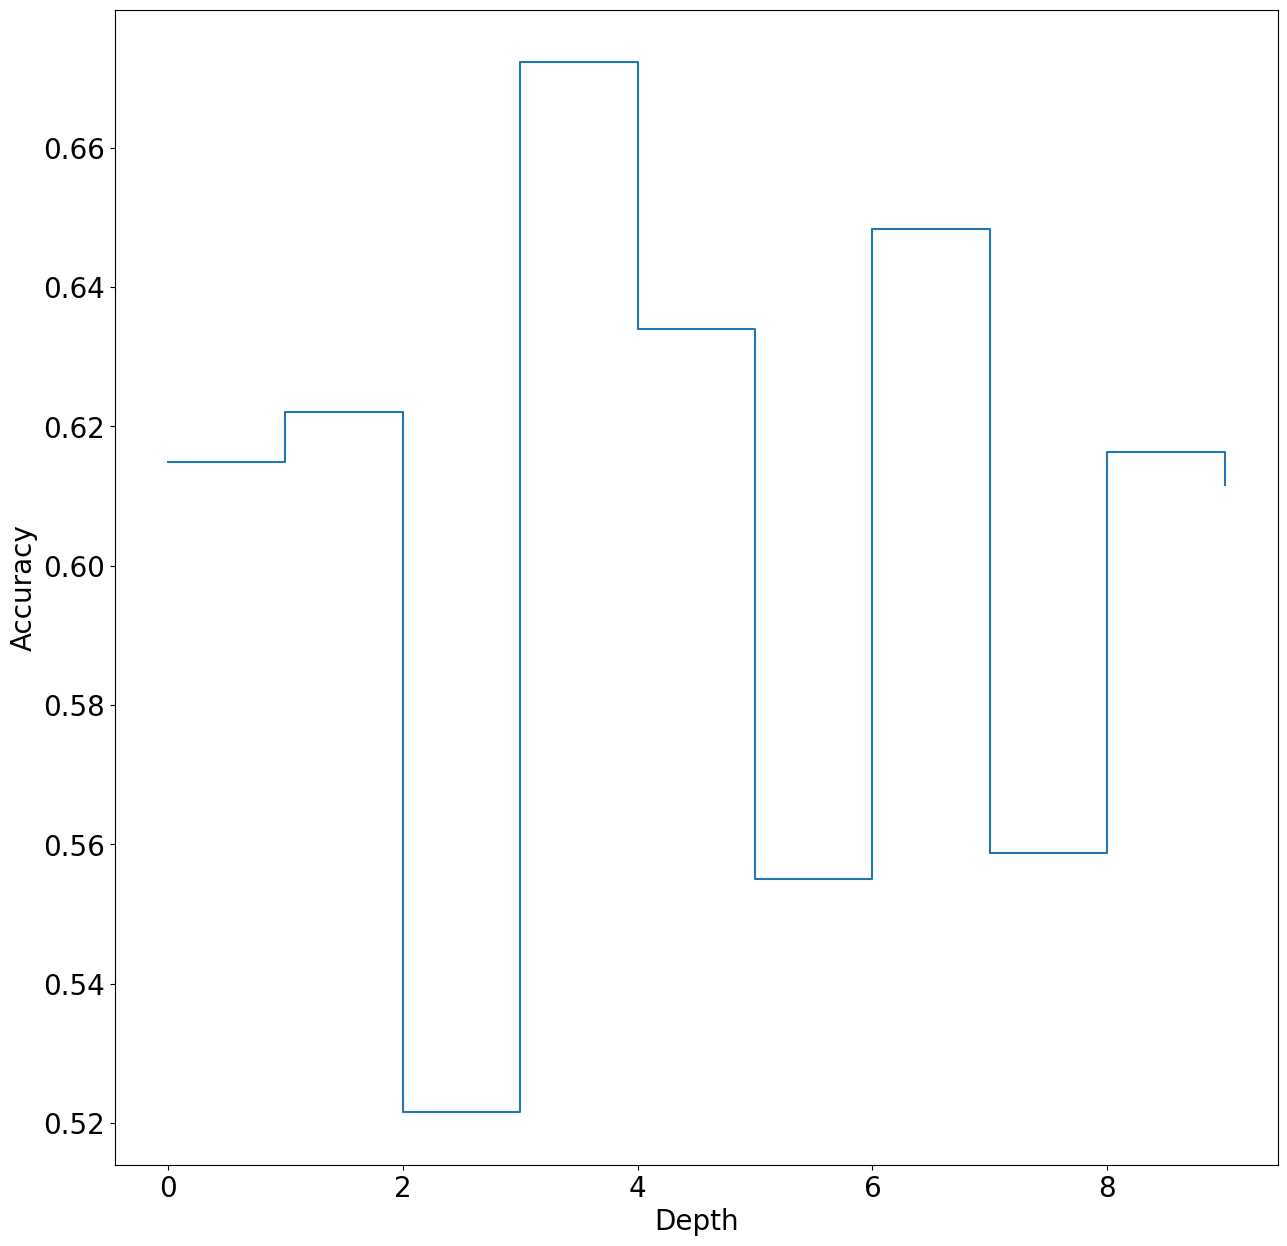

In [60]:
fig, ax =plt.subplots()
ax.set_xlabel('Depth')
ax.set_ylabel('Accuracy')
ax.plot(val['Tree'],val['Acurracy'],drawstyle="steps-post")
plt.show()

In [61]:
alv = []
for ccp_alpha in ccp_alphas:
    daa = ExtraTreeClassifier(random_state= 42,ccp_alpha = ccp_alpha)
    scores = cross_val_score(daa, xtrain , ytrain, cv = 10)
    alv.append([ccp_alpha,np.mean(scores),np.std(scores)])
adf = pd.DataFrame(data = alv, columns = ['Alpha', 'Mean Score', 'Std Score'])

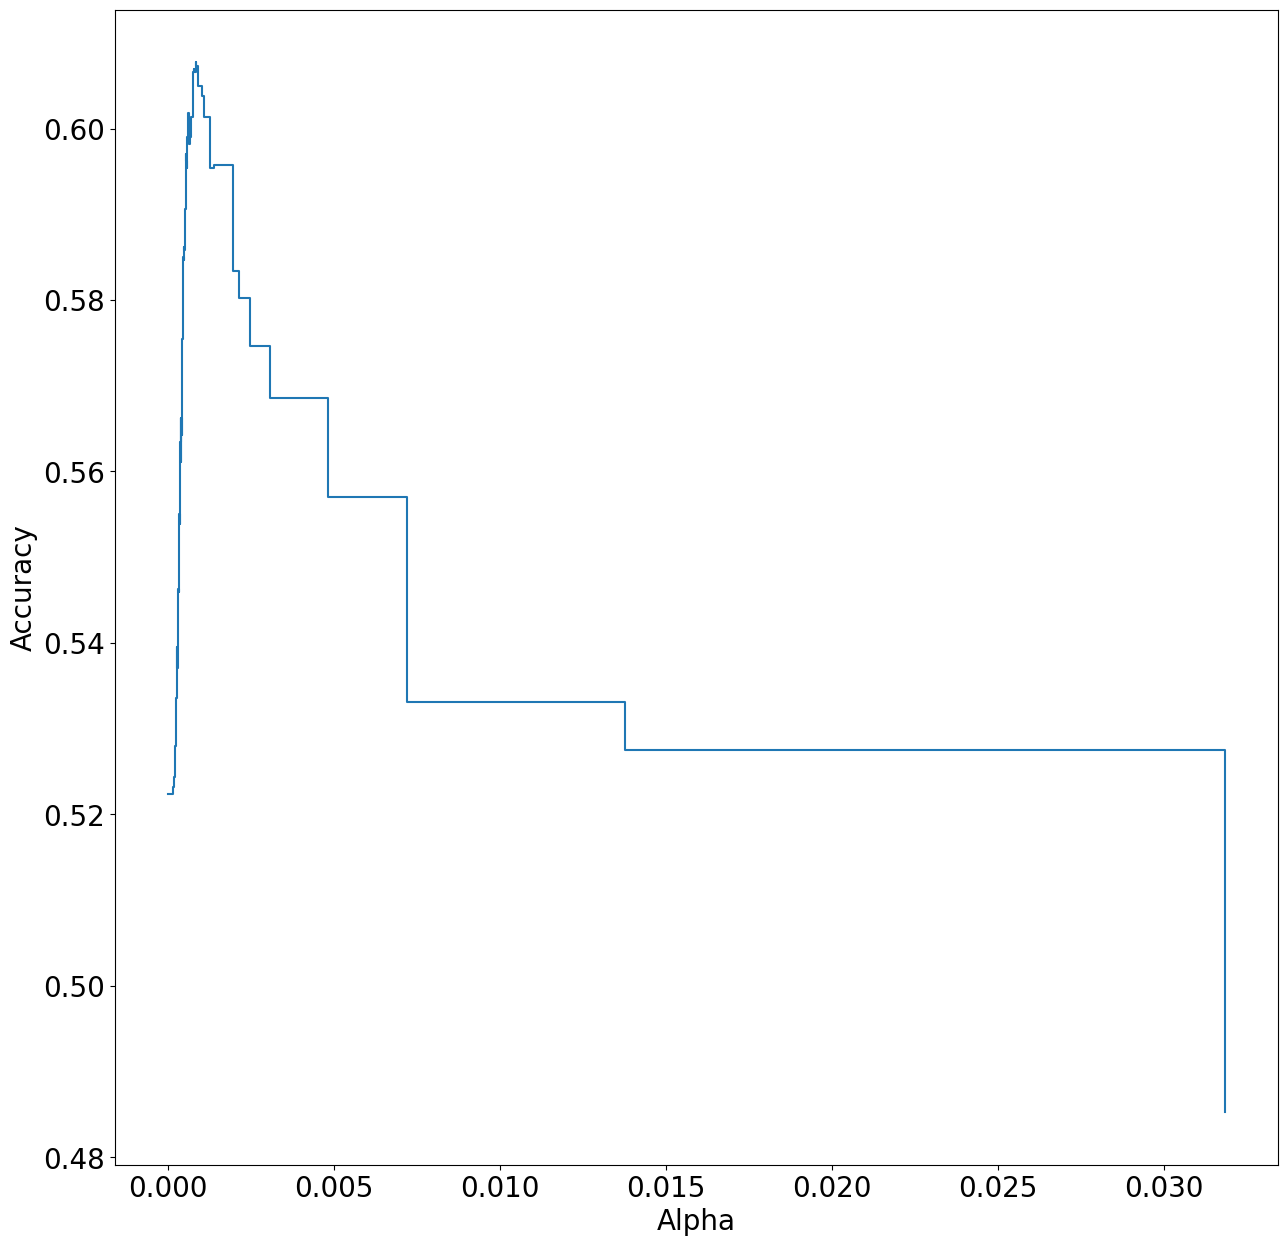

In [62]:
fig, ax =plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.plot(adf['Alpha'],adf['Mean Score'],drawstyle="steps-post")
plt.savefig('ccpacc')

In [63]:
adf = adf.sort_values(by=['Mean Score'],ascending=False)
zxc = adf.iloc[0,0]
zxc

0.0008350791315768456

The post-pruned extra tree with a ccp alpha value of 0.000835 has the highest accuracy

In [64]:
eta = ExtraTreeClassifier(random_state= 42,criterion='gini',ccp_alpha = zxc)
eta.fit(xtrain, ytrain)

ExtraTreeClassifier(ccp_alpha=0.0008350791315768456, random_state=42)

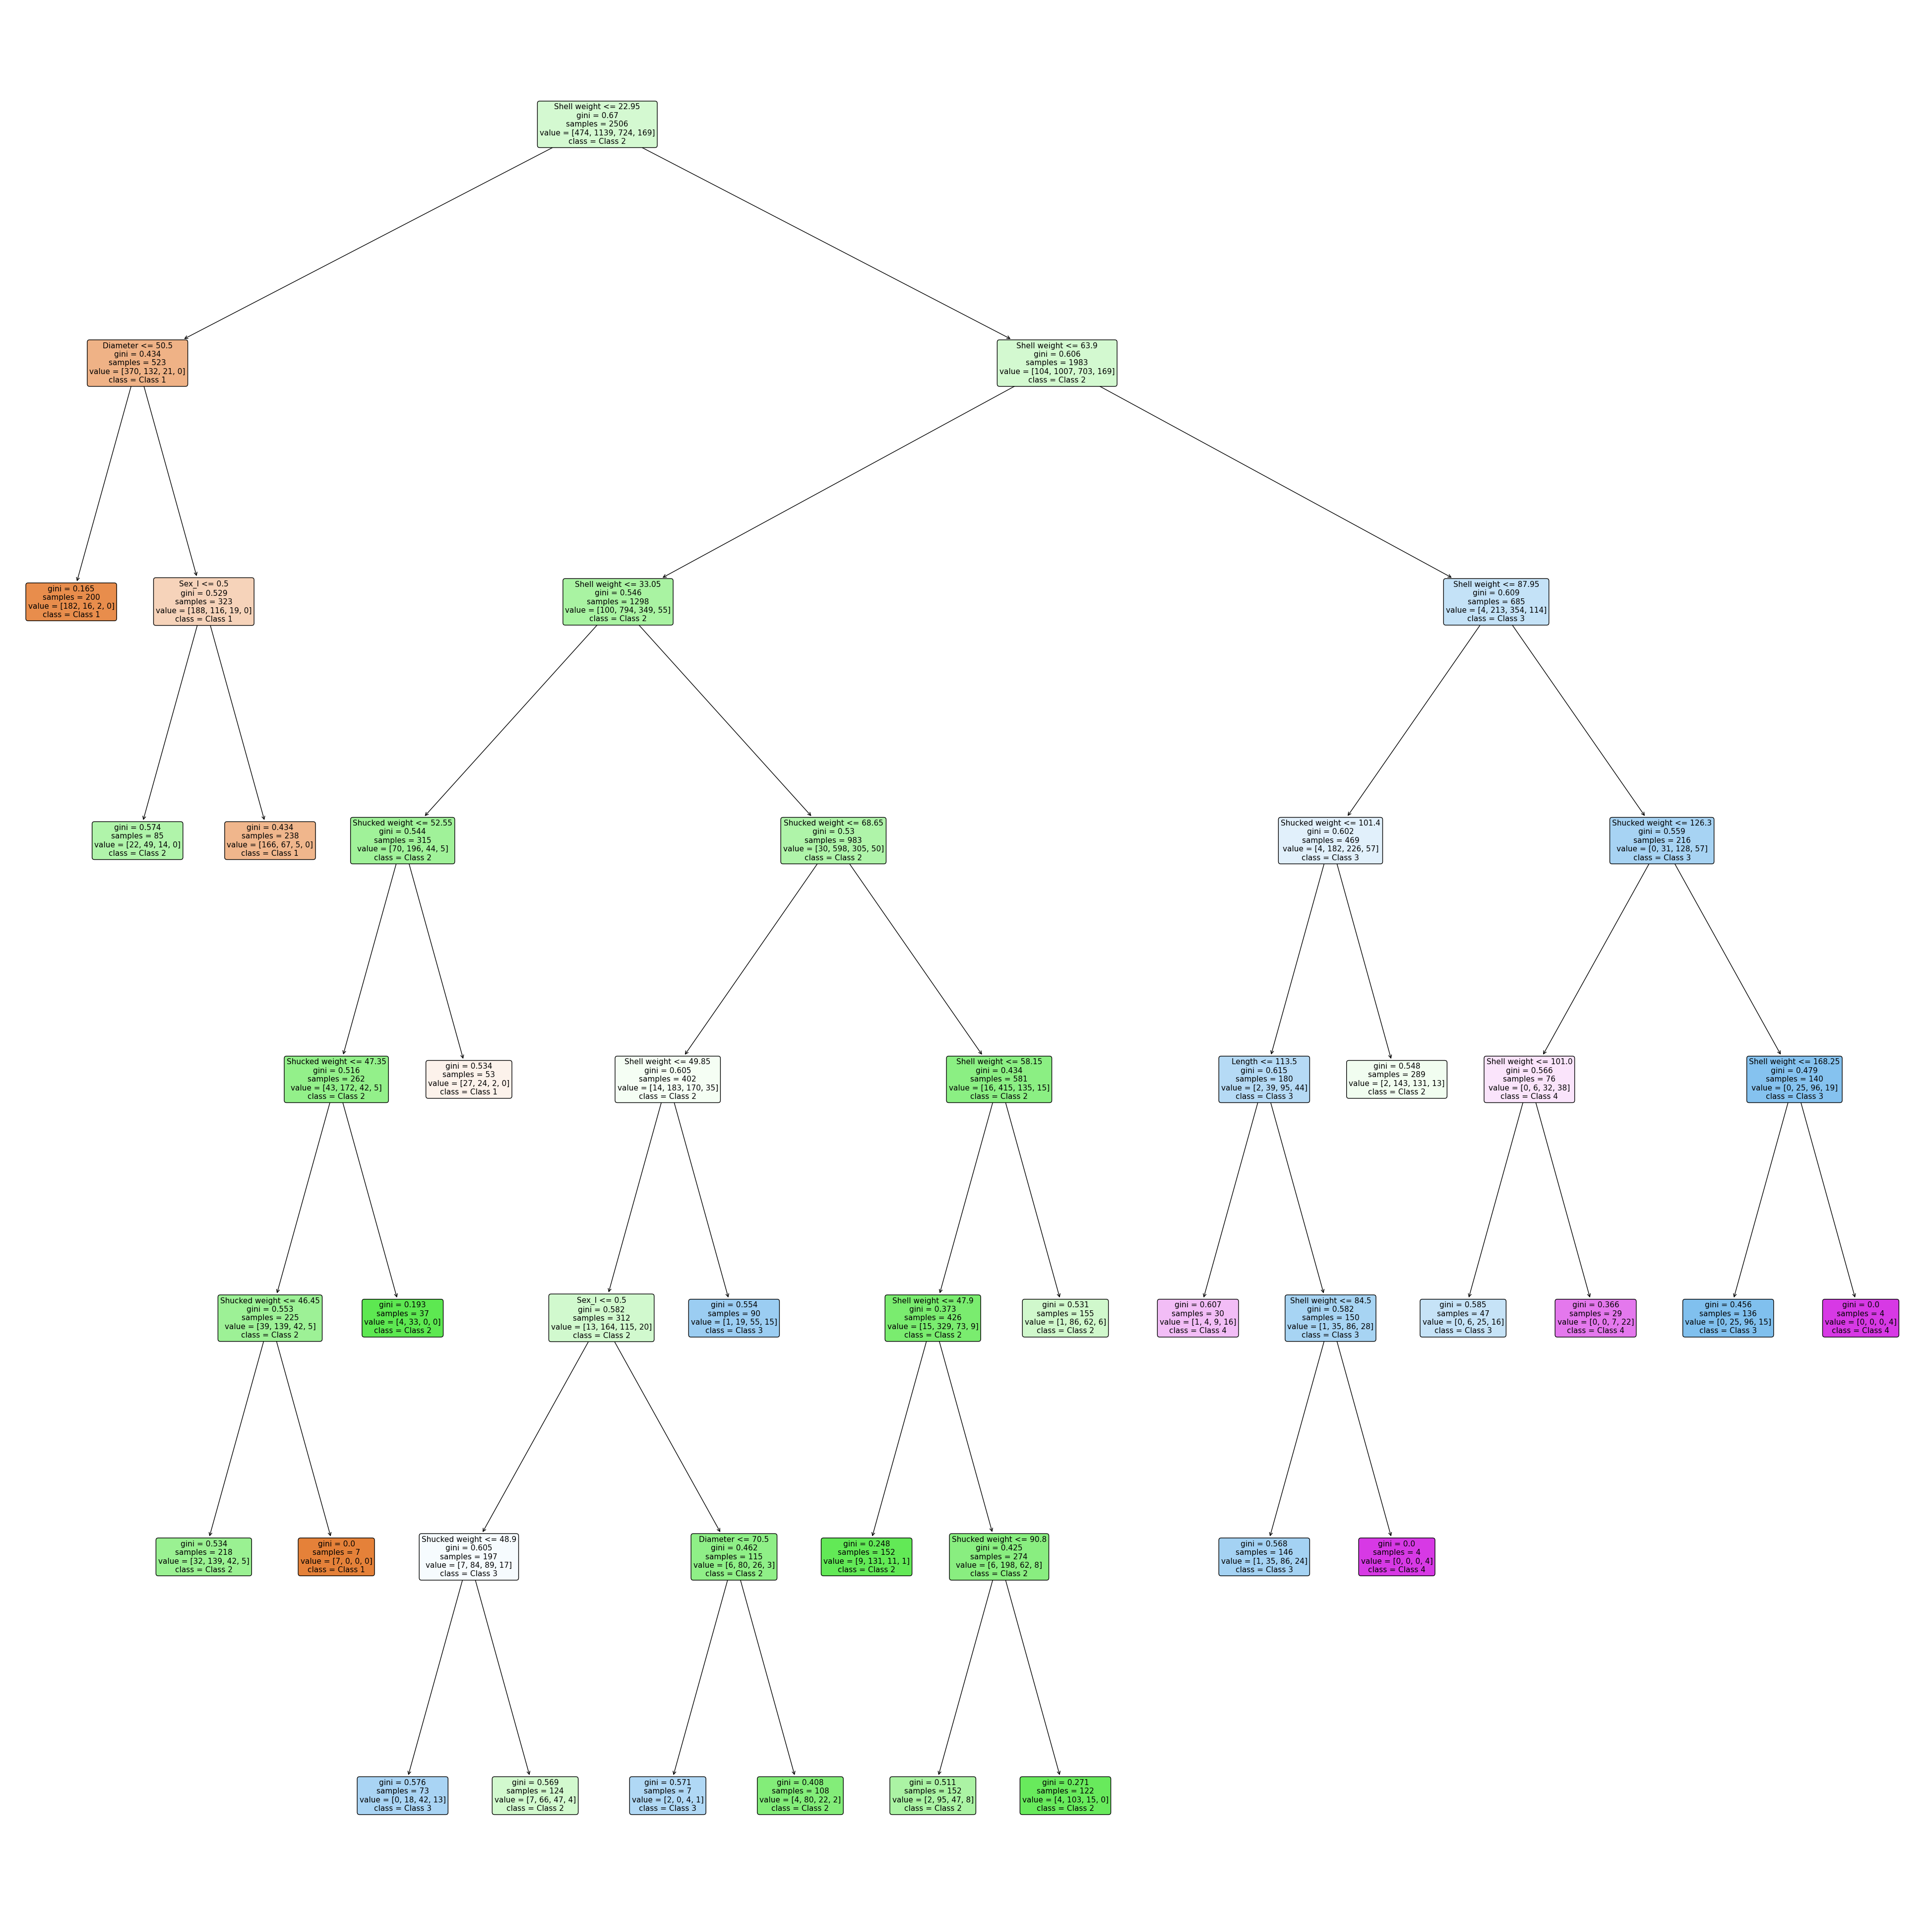

In [65]:
plt.figure(figsize = (50,50))
plot_tree(pdt, filled = True, rounded = True,class_names= ['Class 1','Class 2','Class 3','Class 4'],feature_names = x.columns,fontsize = 11)
plt.savefig('pextr.png')

In [66]:
ypred = eta.predict(xtest)
confusion_matrix(ytest, ypred)

array([[249, 114,   2,   0],
       [ 43, 565, 144,   0],
       [  7, 245, 207,   3],
       [  0,  41,  44,   7]], dtype=int64)

In [67]:
eta.score(xtest, ytest)

0.6152004787552364

In [68]:
cross_val_score(eta, x , y, cv = 10).mean()

0.6054513327137332

In [69]:
f1_score(ytest, ypred,average = 'weighted')

0.6008083420280427

The post - pruned extra tree classifier has a cross validated accuracy of 60.55%

## Bagging for Random Forest

In [70]:
xr = x.to_numpy()
yr = y.to_numpy()
yr = yr.flatten()

In [71]:
xrtrain, xrtest, yrtrain, yrtest = train_test_split(xr,yr, test_size=0.4, random_state=42, shuffle=True)

#### Finding the correct number of Estimators

In [ ]:
alv = []
for i in range(1,101):  
    print('The number of Estimators are', i )
    rf = RandomForestClassifier(n_estimators=i, random_state=42)
    rfs = cross_val_score(rf, xr , yr, cv = 10).mean()
    bg = BaggingClassifier(rf,n_estimators=i, random_state=42)
    bgs = cross_val_score(bg, xr, yr, cv = 10).mean()
    alv.append([i,rfs,bgs])
    bagrf = pd.DataFrame(data = alv, columns = ['Estimator', 'Random','Bagging'])
    bagrf.to_csv('est.csv')

ran = bagrf.sort_values(by=['Random'],ascending=False)
bag = bagrf.sort_values(by=['Bagging'],ascending=False)
ranm = ran.iloc[0,0]
bagn = bag.iloc[0,0]
print('The best estimator for Random forest is ',ranm)
print('The best estimator for Bagging Classifier is ',bagn)

In [72]:
#Random Forest and Bagging Esitmator File
bagrf = pd.read_csv(r'C:\Users\mayan\Downloads\est.csv')
ran = bagrf.sort_values(by=['Random'],ascending=False)
bag = bagrf.sort_values(by=['Bagging'],ascending=False)
ranm = ran.iloc[0,1]
bagn = bag.iloc[0,1]
print('The best estimator for Random forest is ',ranm)
print('The best estimator for Bagging Classifier is ',bagn)

The best estimator for Random forest is  100
The best estimator for Bagging Classifier is  61


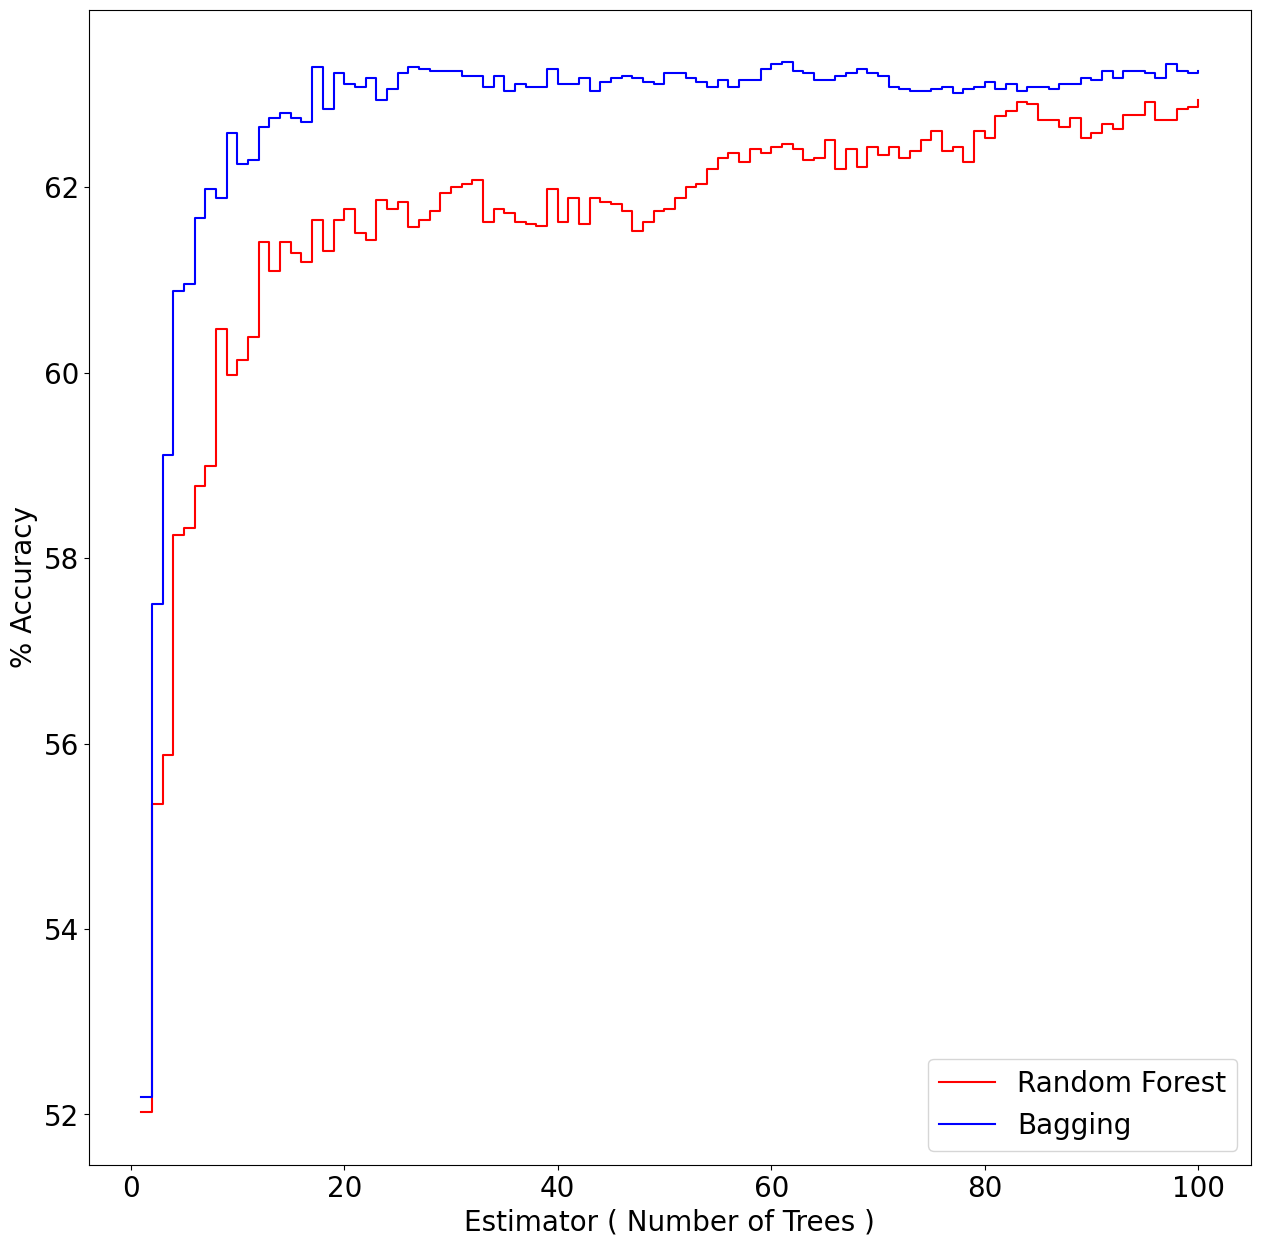

In [73]:
fig, ax =plt.subplots()
ax.set_xlabel('Estimator ( Number of Trees )')
ax.set_ylabel('% Accuracy')
ax.plot(bagrf['Estimator'], bagrf['Random']*100, drawstyle="steps-post", color = 'red', label = 'Random Forest')
ax.plot(bagrf['Estimator'], bagrf['Bagging']*100, drawstyle="steps-post", color = 'blue', label = 'Bagging')
ax.legend()
plt.savefig('est.png')
plt.show()

### Random Forest

#### Finding the correct tree depth

In [74]:
alv = []
for i in range(1,16):  
    print('The max tree depth is', i )
    rfd = RandomForestClassifier(n_estimators=ranm, max_depth = i,random_state=42)
    rfds = cross_val_score(rfd, xr , yr, cv = 10).mean()
    alv.append([i,rfds])
    rfdsf = pd.DataFrame(data = alv, columns = ['Max Depth', 'Accuracy'])

The max tree depth is 1
The max tree depth is 2
The max tree depth is 3
The max tree depth is 4
The max tree depth is 5
The max tree depth is 6
The max tree depth is 7
The max tree depth is 8
The max tree depth is 9
The max tree depth is 10
The max tree depth is 11
The max tree depth is 12
The max tree depth is 13
The max tree depth is 14
The max tree depth is 15


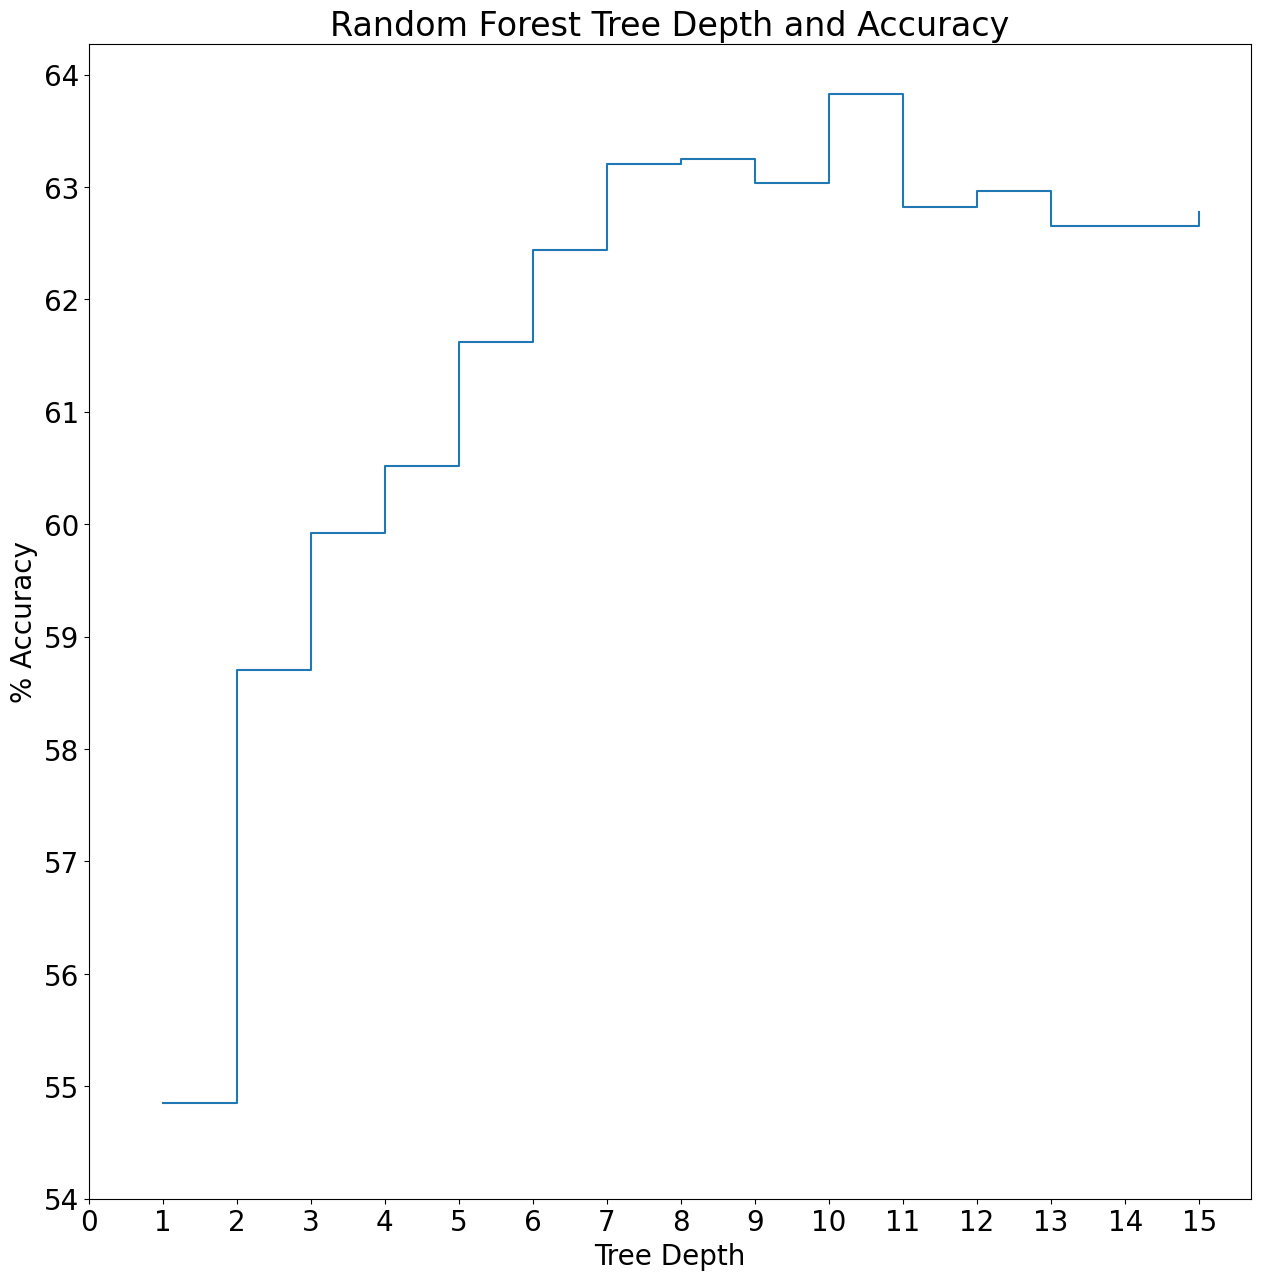

In [75]:
fig, ax =plt.subplots()
ax.set_xlabel('Tree Depth')
ax.set_ylabel('% Accuracy')
ax.set_title('Random Forest Tree Depth and Accuracy')
ax.plot(rfdsf['Max Depth'], rfdsf['Accuracy']*100, drawstyle="steps-post")
plt.yticks(np.arange(54,65, step=1))
plt.xticks(np.arange(0,16, step=1))
plt.savefig('rfdepth.png')
plt.show()

In [76]:
rfs =  rfdsf.sort_values(by=['Accuracy'],ascending=False)
rfd = rfs.iloc[0,0]
rfd

10

The optimum tree depth for the random forest model is 10

In [77]:
rf = RandomForestClassifier(n_estimators=ranm, max_depth = rfd,random_state=42)
rf.fit(xrtrain,yrtrain)

RandomForestClassifier(max_depth=10, random_state=42)

In [78]:
y_pred = rf.predict(xrtest)
confusion_matrix(yrtest, y_pred)

array([[252, 110,   3,   0],
       [ 42, 565, 142,   3],
       [  7, 195, 252,   8],
       [  0,  15,  66,  11]], dtype=int64)

In [79]:
accuracy_score(yrtest, y_pred)

0.6463195691202872

In [80]:
cross_val_score(rf, xr , yr, cv = 10).mean()

0.6382545638130643

In [81]:
f1_score(yrtest, y_pred,average = 'weighted')

0.6372196749825951

The Random Forest classifier has a cross validated accuracy of 63.82%

#### Bagging Classifier

In [82]:
bg = BaggingClassifier(rf,n_estimators=bagn, random_state=42)
bg.fit(xrtrain, yrtrain)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=10,
                                                        random_state=42),
                  n_estimators=61, random_state=42)

In [83]:
ypred = bg.predict(xrtest)
confusion_matrix(yrtest, ypred)

array([[255, 108,   2,   0],
       [ 39, 577, 134,   2],
       [  8, 200, 249,   5],
       [  0,  15,  69,   8]], dtype=int64)

In [84]:
accuracy_score(yrtest, ypred)

0.651705565529623

In [85]:
cross_val_score(bg, xr , yr, cv = 10).mean()

0.6389705460511973

In [86]:
f1_score(yrtest, ypred,average = 'weighted')

0.6399309665825914

The Bagging classifier has a cross validated accuracy of 63.89%

# Neural Network

### Adam Solver

In [ ]:
n = 101
alv = []    
for i in range(1,n):
    for j in range(1,n):
        print('Number of Nuerons in the First layer is',i)
        print('Number of Nuerons in the Second layer is',j)
        ca = MLPClassifier(random_state=42, max_iter=600,hidden_layer_sizes=(i,j), activation='relu', solver='adam')
        ca.fit(xrtrain,yrtrain)
        y_pred = ca.predict(xrtest)
        score = accuracy_score(y_pred, yrtest)
        alv.append([i,j,score])
        adam = pd.DataFrame(data = alv, columns = ['First','Second', 'Mean Score'])
        adam.to_csv('adam.csv')
nn1a = adam.sort_values(by=['Mean Score'],ascending=False)
a1 =nn1a.iloc[0,0]
a2 =nn1a.iloc[0,1]
print('The First layer has',a1,'nuerons')
print('The Second layer has',a2,'nuerons')

In [87]:
#adam layer file
adam = pd.read_csv(r'C:\Users\mayan\Downloads\adam.csv')
nn1a = adam.sort_values(by=['Mean Score'],ascending=False)
a1 =nn1a.iloc[0,1]
a2 =nn1a.iloc[0,2]
print('The First layer has',a1,'nuerons')
print('The Second layer has',a2,'nuerons')

The First layer has 32 nuerons
The Second layer has 9 nuerons


In [ ]:
alv = []    
for i in np.arange(0.0001, 0.1001, 0.0001, dtype=float):
    print('The Learning Rate is', i)
    clflr = MLPClassifier(random_state=42, max_iter=600,hidden_layer_sizes=(a1,a2), learning_rate_init=i, activation='relu', solver='adam')
    clflr.fit(xrtrain,yrtrain)
    y_pred = clflr.predict(xrtest)
    score = accuracy_score(y_pred, ytest)
    alv.append([i,score])
    alr = pd.DataFrame(data = alv, columns = ['Learning Rate', 'Mean Score'])
    alr.to_csv('adamlr.csv')
nnlra = alr.sort_values(by=['Mean Score'],ascending=False)
n1lra = nnlra.iloc[0,0]
print('The Optimum Learning rate is',n1lra)

In [88]:
#adam learning file
alr = pd.read_csv(r'C:\Users\mayan\Downloads\adamlr.csv') 
nnlra = alr.sort_values(by=['Mean Score'],ascending=False)
n1lra = nnlra.iloc[0,1]
print('The Optimum Learning rate is',n1lra)

The Optimum Learning rate is 0.0107


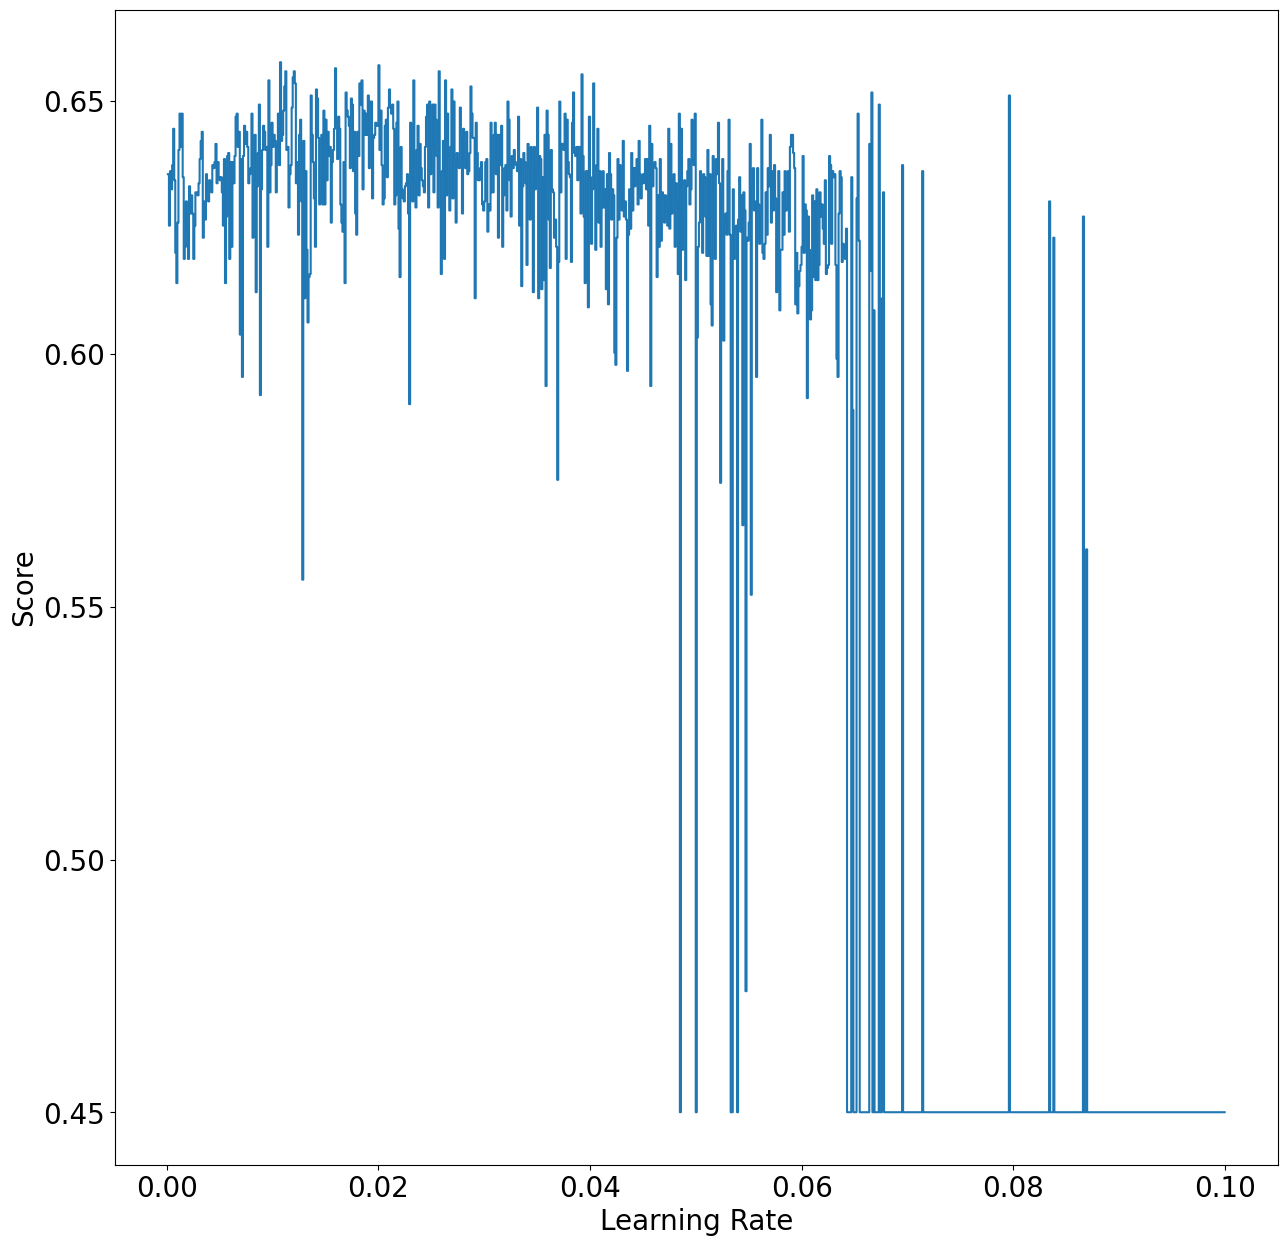

In [89]:
fig, ax =plt.subplots()
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Score')
ax.plot(alr['Learning Rate'], alr['Mean Score'], drawstyle="steps-post")
plt.show()

In [90]:
ada = MLPClassifier(random_state=42, max_iter=600,hidden_layer_sizes=(a1,a2),learning_rate_init=n1lra, activation='relu', solver= 'adam')
ada.fit(xrtrain, yrtrain)
ypred = ada.predict(xrtest)
confusion_matrix(yrtest, ypred)

array([[252, 107,   5,   1],
       [ 46, 529, 175,   2],
       [  8, 159, 277,  18],
       [  0,   8,  62,  22]], dtype=int64)

In [91]:
accuracy_score(ytest, ypred)

0.6463195691202872

In [92]:
cross_val_score(ada, xr , yr, cv = 10).mean()

0.6284247243353642

In [93]:
f1_score(yrtest, ypred,average = 'weighted')

0.6443438168210738

Neural Network with ADAM Solver has a cross validated accuracy of 62.84%

### SGD Solver

In [ ]:
n = 101
alv = []    
for i in range(1,n):
    for j in range(1,n):
        print('Number of Nuerons in the First layer is',i)
        print('Number of Nuerons in the Second layer is',j)
        cs = MLPClassifier(random_state=42, max_iter=600,hidden_layer_sizes=(i,j), activation='relu', solver= 'sgd')
        cs.fit(xrtrain,yrtrain)
        y_pred = cs.predict(xrtest)
        score = accuracy_score(y_pred, yrtest)
        alv.append([i,j,score])
        sgd = pd.DataFrame(data = alv, columns = ['First','Second', 'Mean Score'])
        sgd.to_csv('sgd.csv')
nn1a = sgd.sort_values(by=['Mean Score'],ascending=False)
s1 =nn1a.iloc[0,0]
s2 =nn1a.iloc[0,0]
print('The First layers has',s1,'nuerons')
print('The Second layer has',s2,'nuerons')

In [94]:
#SGD layer file
sgd = pd.read_csv(r'C:\Users\mayan\Downloads\sgd.csv')
nn1a = sgd.sort_values(by=['Mean Score'],ascending=False)
s1 =nn1a.iloc[0,1]
s2 =nn1a.iloc[0,2]
print('The First layers has',s1,'nuerons')
print('The Second layer has',s2,'nuerons')

The First layers has 51 nuerons
The Second layer has 57 nuerons


In [ ]:
alv = []    
for i in np.arange(0.0001, 0.1001, 0.0001, dtype=float):
    print('The Learning Rate is', i)
    clflr = MLPClassifier(random_state=42, max_iter=600,hidden_layer_sizes=(s1,s2), learning_rate_init=i, activation='relu', solver='sgd')
    clflr.fit(xrtrain, yrtrain)
    y_pred = clflr.predict(xrtest)
    score = accuracy_score(y_pred, yrtest)
    alv.append([i,score])
    slr = pd.DataFrame(data = alv, columns = ['Learning Rate', 'Mean Score'])
    slr.to_csv('sgdlr.csv')
nnlrs = slr.sort_values(by=['Mean Score'],ascending=False)
n1lrs = nnlrs.iloc[0,0]
print('The Optimum Learning rate is',n1lrs)

In [95]:
#SGD learning file
slr = pd.read_csv(r'C:\Users\mayan\Downloads\sgdlr.csv')
nnlrs = slr.sort_values(by=['Mean Score'],ascending=False)
n1lrs = nnlrs.iloc[0,1]
print('The Optimum Learning rate is',n1lrs)

The Optimum Learning rate is 0.001


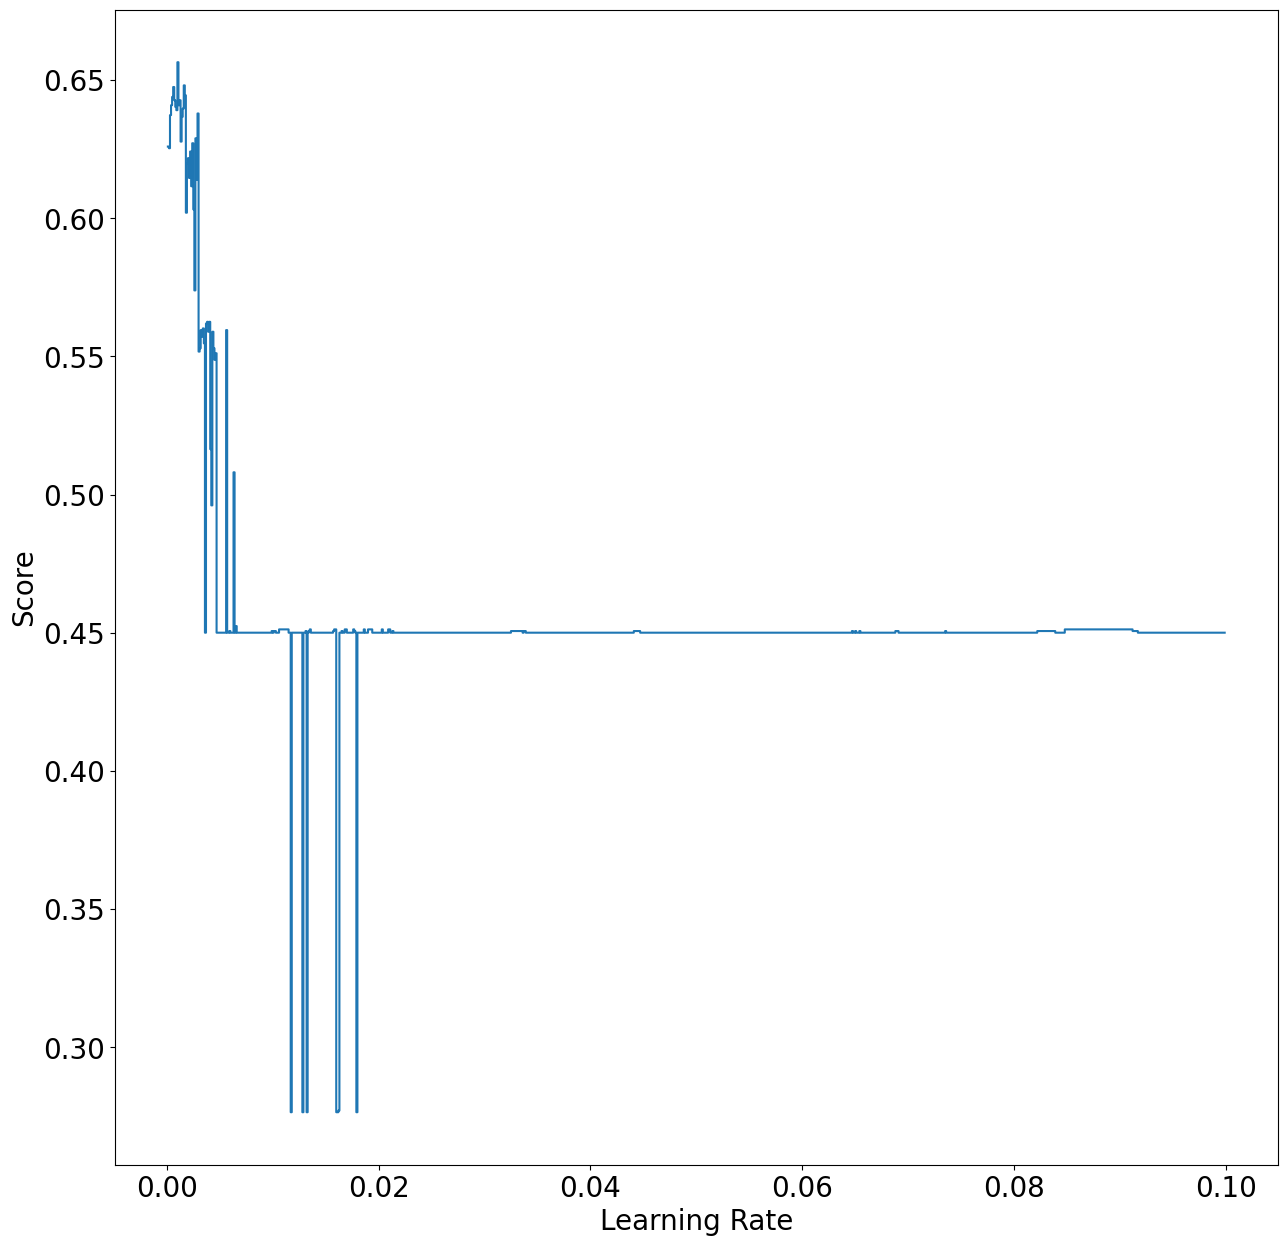

In [96]:
fig, ax =plt.subplots()
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Score')
ax.plot(slr['Learning Rate'], slr['Mean Score'], drawstyle="steps-post")
plt.show()

In [97]:
sgd = MLPClassifier(random_state=42, max_iter=600,hidden_layer_sizes=(s1,s2),learning_rate_init=n1lrs, activation='relu', solver= 'sgd')
sgd.fit(xrtrain, yrtrain)
ypred = sgd.predict(xrtest)
confusion_matrix(yrtest, ypred)

array([[255, 105,   4,   1],
       [ 45, 531, 175,   1],
       [  7, 145, 292,  18],
       [  0,   8,  65,  19]], dtype=int64)

In [98]:
accuracy_score(yrtest, ypred)

0.656493117893477

In [99]:
cross_val_score(sgd, xr , yr, cv = 10).mean()

0.6306013562355857

In [100]:
f1_score(yrtest, ypred,average = 'weighted')

0.6536775197869131

Neural Network with SGD Solver has a cross validated accuracy of 63.06%

 # 10 experiments with different random states in train/test split

In [101]:
def read_data(run_num):   
    data_in = dfef
    data_inputx = data_in.iloc[:,[0,1,2,3,4,5,6,8,9,10]] 
    data_inputy = data_in.iloc[:,7] 
    x_train, x_test, y_train, y_test = train_test_split(data_inputx, data_inputy, test_size=0.40, random_state=run_num,shuffle = True)
    return x_train, x_test, y_train, y_test

In [102]:
def bag_models(x_train, x_test, y_train, y_test, type_model, run_num):

    if type_model ==1: 
        print('Decision Tree Experiment No.', run_num)
        model1 = DecisionTreeClassifier(max_depth = dtd,criterion='gini',random_state=run_num,ccp_alpha = ida)
        model1.fit(x_train, y_train)
        y_pred_test1 = model1.predict(x_test)
        perf_test1 = accuracy_score(y_pred_test1, y_test) 
        return perf_test1
        
    if type_model ==2:
        print('Extra Tree Experiment No.', run_num)
        model2 = ExtraTreeClassifier(max_depth = extd,random_state= 42,criterion='gini',ccp_alpha = zxc)
        model2.fit(x_train, y_train)
        y_pred_test2 = model2.predict(x_test)
        perf_test2 = accuracy_score(y_pred_test2, y_test) 
        return perf_test2
                
    if type_model ==3:
        print('Random Forest Experiment No.', run_num)
        model3 = RandomForestClassifier(n_estimators=ranm,max_depth = rfd, random_state=run_num)
        model3.fit(x_train, y_train)
        y_pred_test3 = model3.predict(x_test)
        perf_test3 = accuracy_score(y_pred_test3, y_test) 
        return perf_test3
            
    if type_model ==4:
        print('Bagging Classifier Experiment No.', run_num)
        model4 = BaggingClassifier((RandomForestClassifier(n_estimators=ranm,max_depth = rfd, random_state=run_num)),n_estimators=bagn, random_state=run_num)
        model4.fit(x_train, y_train)
        y_pred_test4 = model4.predict(x_test)
        perf_test4 = accuracy_score(y_pred_test4, y_test)
        return perf_test4
        
    if type_model ==5:
        print('ADAM Neural Network Experiment No.', run_num)
        model5 = MLPClassifier(random_state=run_num, max_iter=600,hidden_layer_sizes=(a1,a2), learning_rate_init = n1lra, activation='relu', solver='adam')
        model5.fit(x_train, y_train)
        y_pred_test5 = model5.predict(x_test)
        perf_test5 = accuracy_score(y_pred_test5, y_test)
        return perf_test5
        
    if type_model ==6:
        print('SGD Neural Network Experiment No.', run_num)
        model6 = MLPClassifier(random_state=run_num, max_iter=600,hidden_layer_sizes=(s1,s2), learning_rate_init = n1lrs, activation='relu', solver='sgd')
        model6.fit(x_train, y_train)
        y_pred_test6 = model6.predict(x_test)
        perf_test6 = accuracy_score(y_pred_test6, y_test)
        return perf_test6  
     

In [103]:
max_expruns = 11
tree_all = np.zeros(max_expruns) 
extra_all = np.zeros(max_expruns)
forest_all = np.zeros(max_expruns)
bagging_all = np.zeros(max_expruns)
adam_all = np.zeros(max_expruns)
sgd_all = np.zeros(max_expruns)

In [104]:
alv = []
for run_num in range(1,max_expruns): 
    x_train, x_test, y_train, y_test = read_data(run_num)   
    acc_tree = bag_models(x_train, x_test, y_train, y_test, 1, run_num) 
    acc_ext = bag_models(x_train, x_test, y_train, y_test, 2, run_num) 
    acc_forest = bag_models(x_train, x_test, y_train, y_test, 3, run_num)
    acc_bagging = bag_models(x_train, x_test, y_train, y_test, 4, run_num)
    acc_adam = bag_models(x_train, x_test, y_train, y_test, 5, run_num)
    acc_sgd = bag_models(x_train, x_test, y_train, y_test, 6, run_num)
    tree_all[run_num] = acc_tree
    acc_tree = acc_tree*100
    extra_all[run_num] = acc_ext
    acc_ext = acc_ext*100
    forest_all[run_num] = acc_forest
    acc_forest = acc_forest*100
    bagging_all[run_num] = acc_bagging
    acc_bagging = acc_bagging*100
    adam_all[run_num] = acc_adam
    acc_adam = acc_adam*100
    sgd_all[run_num] = acc_sgd
    acc_sgd = acc_sgd*100
    alv.append([run_num,acc_tree,acc_ext,acc_forest,acc_bagging,acc_adam,acc_sgd])
    nad = pd.DataFrame(data = alv, columns = ['Run', 'Tree','Extra', 'Forest','Bagging','Adam','Sgd'])    

Decision Tree Experiment No. 1
Extra Tree Experiment No. 1
Random Forest Experiment No. 1
Bagging Classifier Experiment No. 1
ADAM Neural Network Experiment No. 1
SGD Neural Network Experiment No. 1
Decision Tree Experiment No. 2
Extra Tree Experiment No. 2
Random Forest Experiment No. 2
Bagging Classifier Experiment No. 2
ADAM Neural Network Experiment No. 2
SGD Neural Network Experiment No. 2
Decision Tree Experiment No. 3
Extra Tree Experiment No. 3
Random Forest Experiment No. 3
Bagging Classifier Experiment No. 3
ADAM Neural Network Experiment No. 3
SGD Neural Network Experiment No. 3
Decision Tree Experiment No. 4
Extra Tree Experiment No. 4
Random Forest Experiment No. 4
Bagging Classifier Experiment No. 4
ADAM Neural Network Experiment No. 4
SGD Neural Network Experiment No. 4
Decision Tree Experiment No. 5
Extra Tree Experiment No. 5
Random Forest Experiment No. 5
Bagging Classifier Experiment No. 5
ADAM Neural Network Experiment No. 5
SGD Neural Network Experiment No. 5
Decis

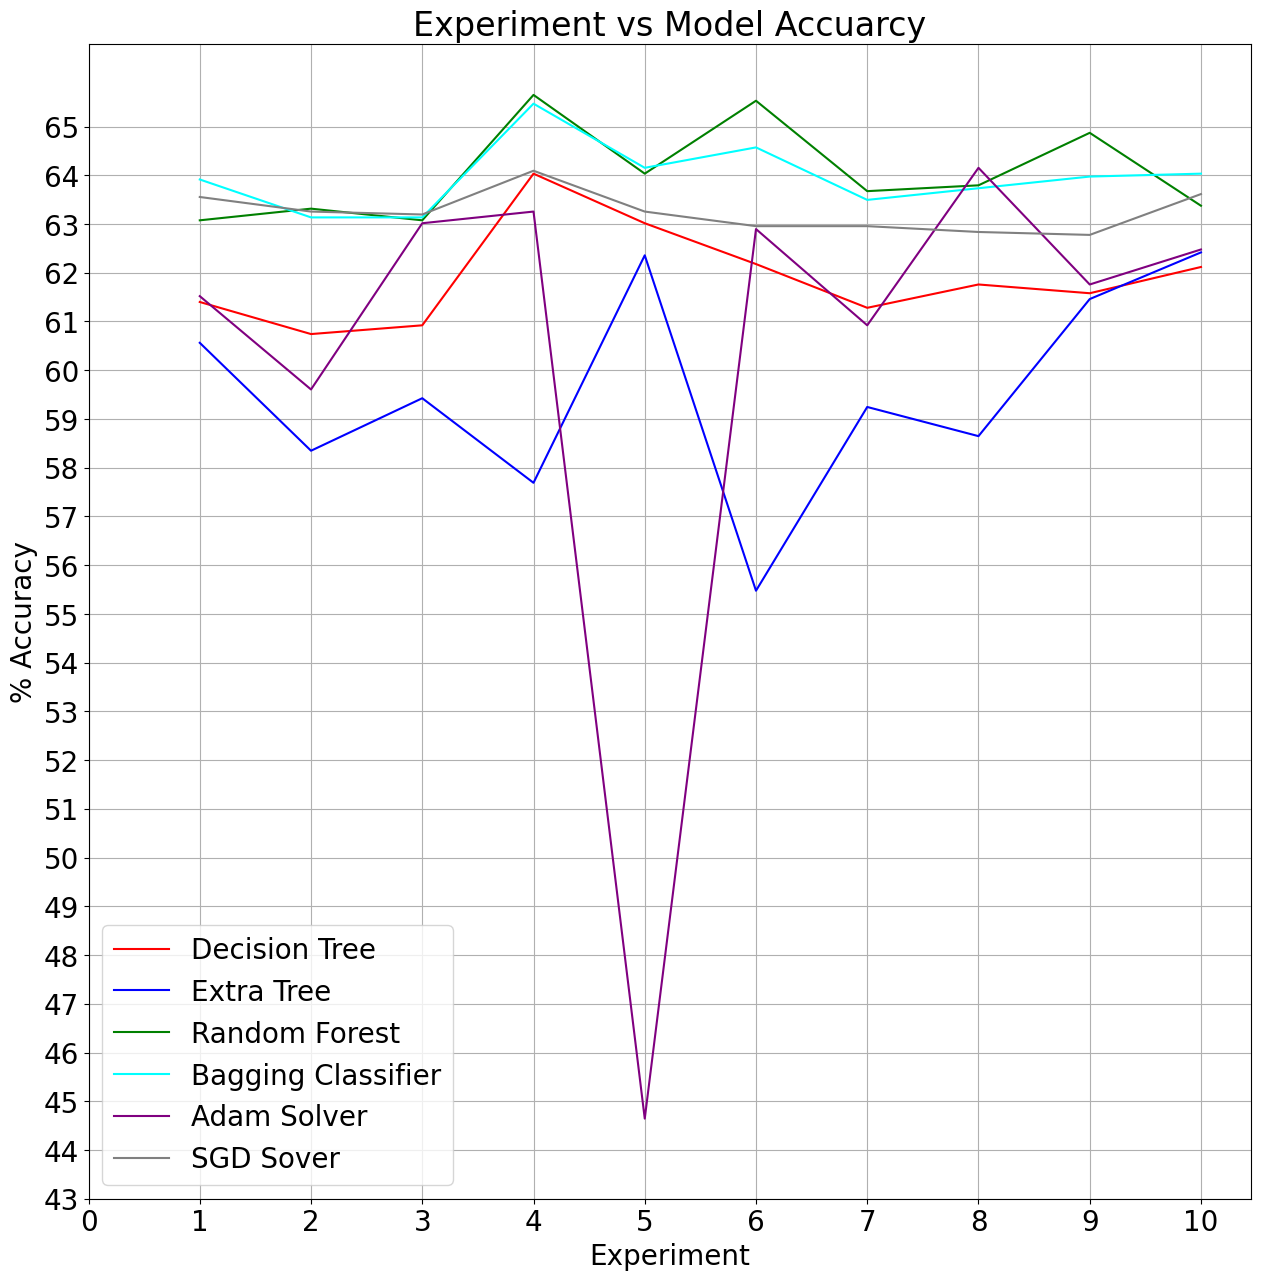

In [105]:
fig, ax =plt.subplots()
ax.set_xlabel('Experiment')
ax.set_ylabel('% Accuracy')
ax.plot(nad['Run'], nad['Tree'], color = 'red', label = 'Decision Tree')
ax.plot(nad['Run'], nad['Extra'], color = 'blue', label = 'Extra Tree')
ax.plot(nad['Run'], nad['Forest'], color = 'green', label = 'Random Forest')
ax.plot(nad['Run'], nad['Bagging'], color = 'cyan', label = 'Bagging Classifier')
ax.plot(nad['Run'], nad['Adam'], color = 'purple', label = 'Adam Solver')
ax.plot(nad['Run'], nad['Sgd'], color = 'grey', label = 'SGD Sover')
ax.set_xticks(np.arange(0, 11, step=1))
ax.set_yticks(np.arange(43, 66, step= 1))
ax.set_title('Experiment vs Model Accuarcy')
ax.grid()
ax.legend()
plt.savefig('Average Model Accuracy Run.png')


In [106]:
print('All Decision Tree Accuracy\n',nad['Tree'])
print('Mean Decision Tree Accuracy',np.mean(nad['Tree']))
print('Decision Tree Std. Dev.',np.std(nad['Tree']))
print('Con Int Decision Tree Accuracy', st.t.interval(confidence=0.95, df=len(nad['Tree'])-1, loc=np.mean(nad['Tree']), scale=st.sem(nad['Tree'])))

print('All Extra Tree Accuracy\n',nad['Extra'], )
print('Mean Extra Tree Accuracy',np.mean(nad['Extra']))
print('Decision Extra Tree Std. Dev.',np.std(nad['Extra']))
print('Con Int Extra Tree Accuracy', st.t.interval(confidence=0.95, df=len(nad['Extra'])-1, loc=np.mean(nad['Extra']), scale=st.sem(nad['Extra'])))

print('All Random Forest Accuracy\n',nad['Forest'])
print('Mean Random Forest Accuracy',np.mean(nad['Forest']))
print('Random Forest Std. Dev.',np.std(nad['Forest']))
print('Con Int Random Forest Accuracy', st.t.interval(confidence=0.95, df=len(nad['Forest'])-1, loc=np.mean(nad['Forest']), scale=st.sem(nad['Forest'])))

print('All Bagging Classifier Accuracy\n',nad['Bagging'], )
print('Mean Bagging Classifier Accuracy',np.mean(nad['Bagging']))
print('Bagging Classifier Std. Dev.',np.std(nad['Bagging']))
print('Con Int Bagging Classifier Accuracy', st.t.interval(confidence=0.95, df=len(nad['Bagging'])-1, loc=np.mean(nad['Bagging']), scale=st.sem(nad['Bagging'])))

print('All ADAM Accuracy\n',nad['Adam'], )
print('Mean ADAM Accuracy',np.mean(nad['Adam']))
print('ADAM Std. Dev.',np.std(nad['Adam']))
print('Con Int ADAM Accuracy', st.t.interval(confidence=0.95, df=len(nad['Adam'])-1, loc=np.mean(nad['Adam']), scale=st.sem(nad['Adam'])))

print('All SGD Accuracy\n',nad['Sgd'], )
print('Mean SGD Accuracy',np.mean(nad['Sgd']))
print('SGD Std. Dev.',np.std(nad['Sgd']))
print('Con Int SGD Accuracy', st.t.interval(confidence=0.95, df=len(nad['Sgd'])-1, loc=np.mean(nad['Sgd']), scale=st.sem(nad['Sgd'])))

All Decision Tree Accuracy
 0    61.400359
1    60.742071
2    60.921604
3    64.033513
4    63.016158
5    62.178336
6    61.280670
7    61.759425
8    61.579892
9    62.118492
Name: Tree, dtype: float64
Mean Decision Tree Accuracy 61.90305206463195
Decision Tree Std. Dev. 0.947433509379452
Con Int Decision Tree Accuracy (61.18863756481076, 62.61746656445314)
All Extra Tree Accuracy
 0    60.562537
1    58.348294
2    59.425494
3    57.690006
4    62.357870
5    55.475763
6    59.245961
7    58.647516
8    61.460203
9    62.417714
Name: Extra, dtype: float64
Mean Extra Tree Accuracy 59.56313584679832
Decision Extra Tree Std. Dev. 2.0786004373219304
Con Int Extra Tree Accuracy (57.995762224210196, 61.13050946938644)
All Random Forest Accuracy
 0    63.076002
1    63.315380
2    63.076002
3    65.649312
4    64.033513
5    65.529623
6    63.674446
7    63.794135
8    64.871335
9    63.375224
Name: Forest, dtype: float64
Mean Random Forest Accuracy 64.03949730700181
Random Forest Std. De

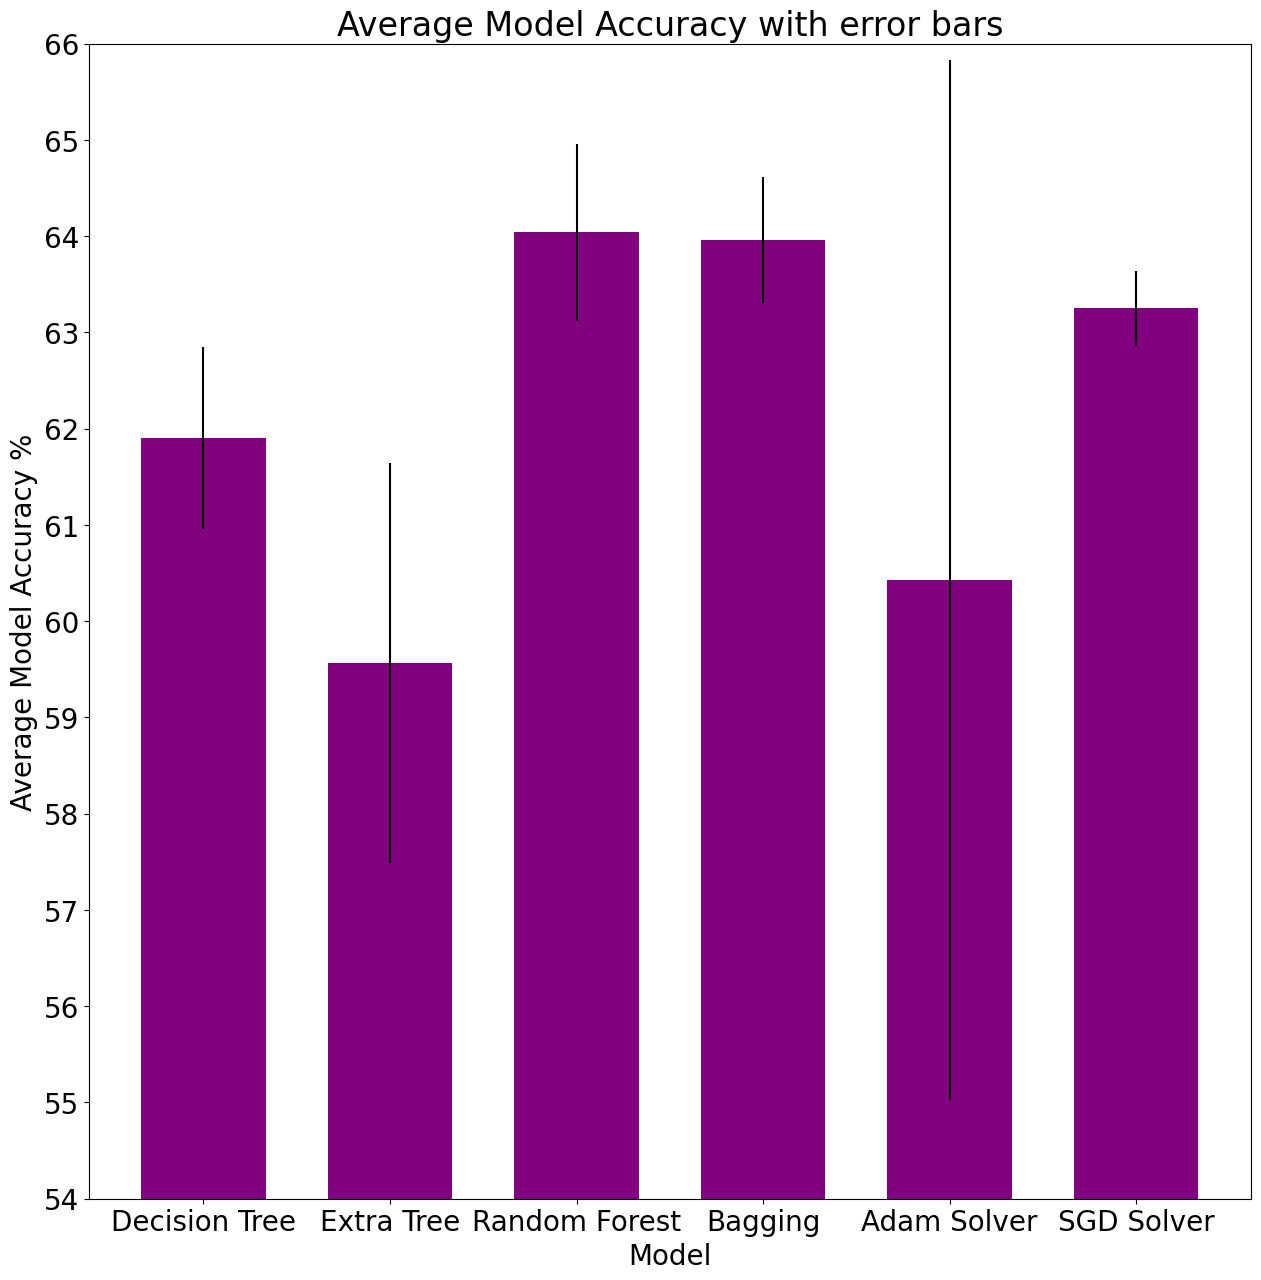

In [107]:
mod = ('Decision Tree', 'Extra Tree', 'Random Forest', 'Bagging', 'Adam Solver', 'SGD Solver')
acc = (np.mean(nad['Tree']), np.mean(nad['Extra']),np.mean(nad['Forest']), np.mean(nad['Bagging']),np.mean(nad['Adam']),np.mean(nad['Sgd']))
std = (np.std(nad['Tree']), np.std(nad['Extra']),np.std(nad['Forest']), np.std(nad['Bagging']),np.std(nad['Adam']),np.std(nad['Sgd']))
plt.bar(mod, acc,yerr =std ,align = 'center',width = 0.666,color ='purple')
plt.yticks(np.arange(54,67, step=1))
plt.ylim(54,66)
plt.xlabel('Model')
plt.ylabel('Average Model Accuracy %')
plt.title('Average Model Accuracy with error bars')
plt.savefig('Average Model Accuracy.png')